# Lista de Exercícios: Agrupamento de dados

## Fco Samuel Marques Pinheiro

Nesta lista de exercícios, você explorará a aplicação de métodos de aprendizado de máquina para realizar tarefas de agrupamento de dados (*clustering*). Você usará a base de dados [Iris plants dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) e avaliará algoritmos de agrupamento para comparar sua efetividade. O objetivo é entender como diferentes métodos de aprendizado de máquina se comportam em relação à tarefa de agrupamento de dados.

Você deverá utilizar os algoritmos [K-Means](https://scikit-learn.org/stable/modules/clustering.html#k-means), [Gaussian Mixture](https://scikit-learn.org/stable/modules/mixture.html#mixture) e [DBSCAN](https://scikit-learn.org/stable/modules/clustering.html#dbscan) e comparar o resultado produzido por cada modelo para o seguinte conjunto de hiperparâmtros, quando aplicável aquele modelo.

* K-means: 
    * Centróides (`n_clusters`): 2, 3, e 6.    
* Gaussian Mixture
    * Componentes (`n_components`): 2, 3, e 6
    * Covariância (`covariance_type`): `'full'`, `'diag'` e `'spherical'`
* DBSCAN:
    * Distância (`eps`): 0.5, 1 e 1.5.
    * Mínimo de amostras (`min_samples`): 5, 10 e 25.


Como parte do objetivo praticar visualizações de dados, para cada experimento, você deve replicar a seguinte visualização usando apenas o [matplotlib](https://matplotlib.org/stable/users/index).


Você deve executar o experimento para cada par *features*, colorindo de acordo com o resultado fornecido pelo modelo de clusterização. Nos elementos da diagonal, você deve executar o cálculo de densidade dos elementos do conjunto usando `KDE` (`bandwidth=1.0, kernel='gaussian'`), também de acordo com a saída do modelo. Compare os experimentos entre si e com o que deveria ser a saída correta dos dados, segundo os rótulos originais do *dataset*. 

Documente todas as etapas em um arquivo Jupyter Notebook (`.ipynb`) que inclua as análises, o código e as justificativas. Lembre-se de que é fundamental justificar todas as decisões tomadas ao longo do processo e documentar as análises de forma clara e concisa. Este trabalho tem como objetivo proporcionar uma compreensão prática da seleção e avaliação de algoritmos de agrupamento em cenários de aprendizado não-supervisionado.

Envie seu Jupyter Notebook até a data de entrega especificada nesta tarefa.

## Solução

### Carregando conjunto de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.datasets import load_iris
from sklearn.neighbors import KernelDensity
from sklearn import metrics

iris = load_iris()
main_df = pd.DataFrame(iris.data, columns=iris.feature_names)
main_df['target'] = iris.target
x = main_df.iloc[:, [0, 1, 2, 3]].values

main_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [2]:
def plotar_clusters( df, algorithm, param_values ):
    clusters = df[algorithm].unique()
    colors = plt.cm.Dark2.colors[ :len( clusters ) ]

    fig, axes = plt.subplots( df.shape[1], df.shape[1],
                            figsize=( 18, 18 ), sharex='col', sharey='row')

    for elem1 in range( df.shape[1] ):
        for elem2 in range( df.shape[1] ):
            if elem1 == elem2:
                for cluster, color in zip(clusters, colors):
                    cluster_points = df[df[algorithm] == cluster]
                    kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
                    kde.fit( cluster_points.iloc[:, elem1 ].values.reshape( -1, 1 ) )
                    x_vals = np.linspace( cluster_points.iloc[ :, elem1 ].min(), cluster_points.iloc[ :, elem1 ].max( ), 1000)
                    log_dens = kde.score_samples( x_vals.reshape( -1, 1 ) )
                    axes[ elem1, elem2 ].plot( x_vals, np.exp( log_dens ), color=color, label=f'{algorithm}={cluster}', alpha=0.7 )
                
                axes[ elem1, elem2 ].axvline( x=df.columns[ elem1 ], color='black', linestyle='--', label='Original Labels', alpha=0.7)  
                    
            else:
                for cluster, color in zip(clusters, colors):
                    cluster_points = df[ df[ algorithm ] == cluster ]
                    axes[elem1, elem2].scatter(cluster_points.iloc[:, elem2], cluster_points.iloc[:, elem1], color=color, label=f'{algorithm}={cluster}', alpha=0.7)
                axes[elem1, elem2].scatter( df[ df[ 'target' ] == 0].iloc[ :, elem2 ],
                                            df[ df[ 'target' ] == 0 ].iloc[ :, elem1], 
                                            color='red', marker='x', label='Original Label=0', alpha=0.7)
    
    handles, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    
    for i in range(df.shape[1]):
        axes[ df.shape[1] - 1, i ].set_xlabel( df.columns[i] )
        axes[ i, 0 ].set_ylabel( df.columns[ i ] )

    # Adicionar título
    fig.suptitle(f'Clusters ({algorithm} - {param_values})', y=1.02)

    
    plt.tight_layout()
    plt.show()

In [3]:
def avaliar_clusters( df, algorithm, param_values ):
    if( algorithm == 'kmeans' ): 
        labels = df[algorithm]
    if( algorithm == 'gaussmix' ):
        labels = df[algorithm]
    if( algorithm == 'dbscan' ):
        labels = df[algorithm] + 1

    silhouet = metrics.silhouette_score( df.iloc[:, :-2], labels )
    calinski = metrics.calinski_harabasz_score( df.iloc[:, :-2], labels )
    davies = metrics.davies_bouldin_score( df.iloc[:, :-2], labels )

    print(f"Evaluation for ({algorithm}) ({param_values}):")
    print(f"Silhouette Score: {silhouet}")
    print(f"Calinski-Harabasz Index: {calinski}")
    print(f"Davies-Bouldin Index: {davies}")
    print("\n")    

### K-means

In [4]:
from sklearn.cluster import KMeans, DBSCAN

#### Resultados dos centróides em 2 (n_clusters = 2).

In [5]:
kmeans = KMeans(n_clusters=2,  n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict( main_df.iloc[:, :-1] )


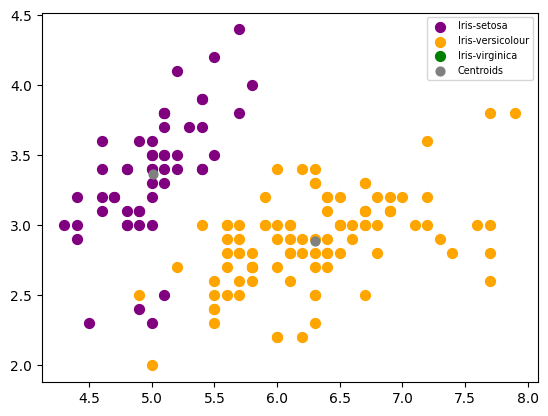

In [6]:
#Visualising the clusters
plt.scatter( x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter( x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter( x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 40, c = 'gray', label = 'Centroids')
plt.legend( fontsize= 'x-small')

#### Resultados dos centróides em 3 (n_clusters 3).

In [7]:
kmeans = KMeans(n_clusters=3, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict( main_df.iloc[:, :-1] )

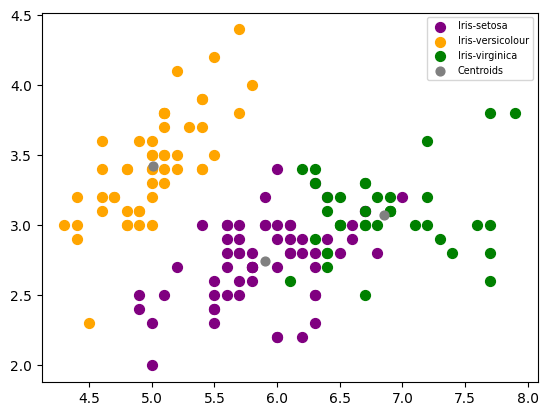

In [8]:
#Visualising the clusters
plt.scatter( x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter( x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter( x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 40, c = 'gray', label = 'Centroids')
plt.legend( fontsize= 'x-small')

Resultados dos centróides em 6 (n_clusters 6).

In [9]:
kmeans = KMeans(n_clusters=6, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict( main_df.iloc[:, :-1] )

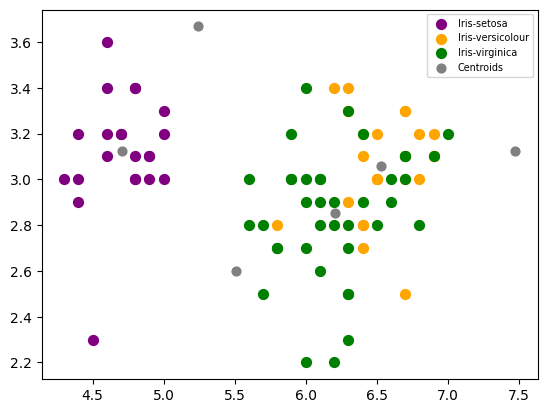

In [10]:
#Visualising the clusters
plt.scatter( x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter( x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter( x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 40, c = 'gray', label = 'Centroids')
plt.legend( fontsize= 'x-small')

### Avaliando elementos da diagonal:

cálculo de densidade dos elementos do conjunto usando KDE (bandwidth=1.0, kernel='gaussian'), de acordo com a saída do modelo.

In [11]:
def run_kmeans( df, num_clusters):
    kmeans = KMeans( n_clusters = num_clusters, random_state=0, n_init=10 )
    df['kmeans'] = kmeans.fit_predict( df.iloc[:, :-1] )

    return df

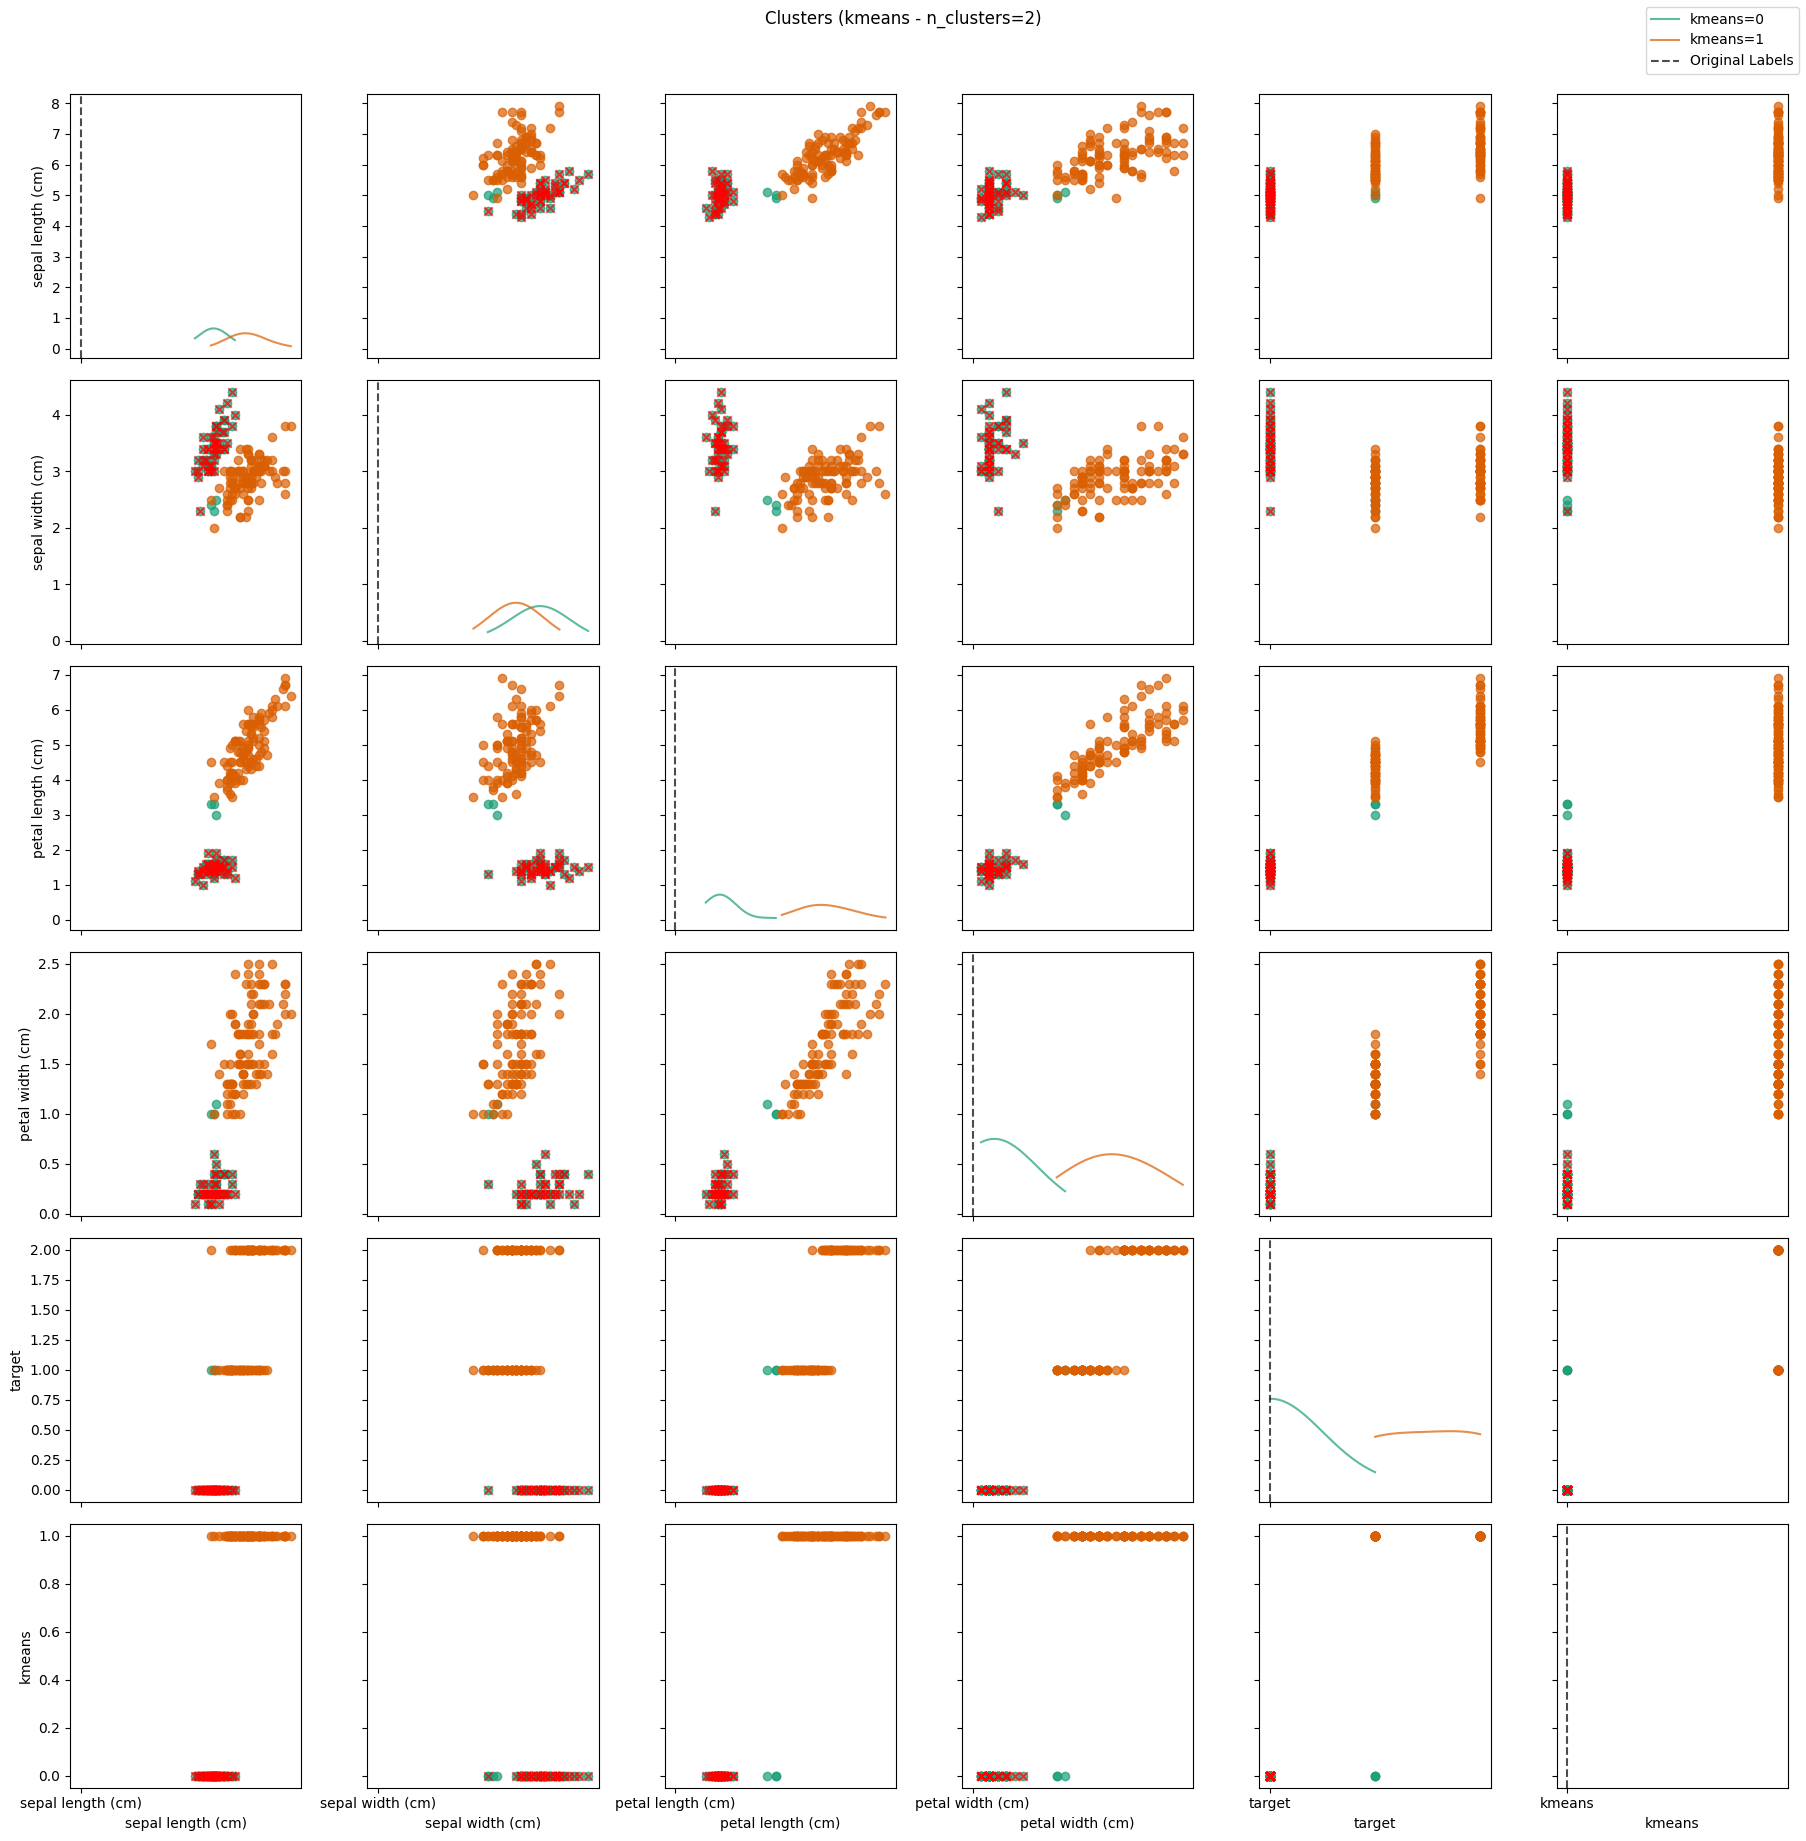

Evaluation for (kmeans) (n_clusters=2):
Silhouette Score: 0.6810461692117465
Calinski-Harabasz Index: 513.9245459802769
Davies-Bouldin Index: 0.40429283717304343




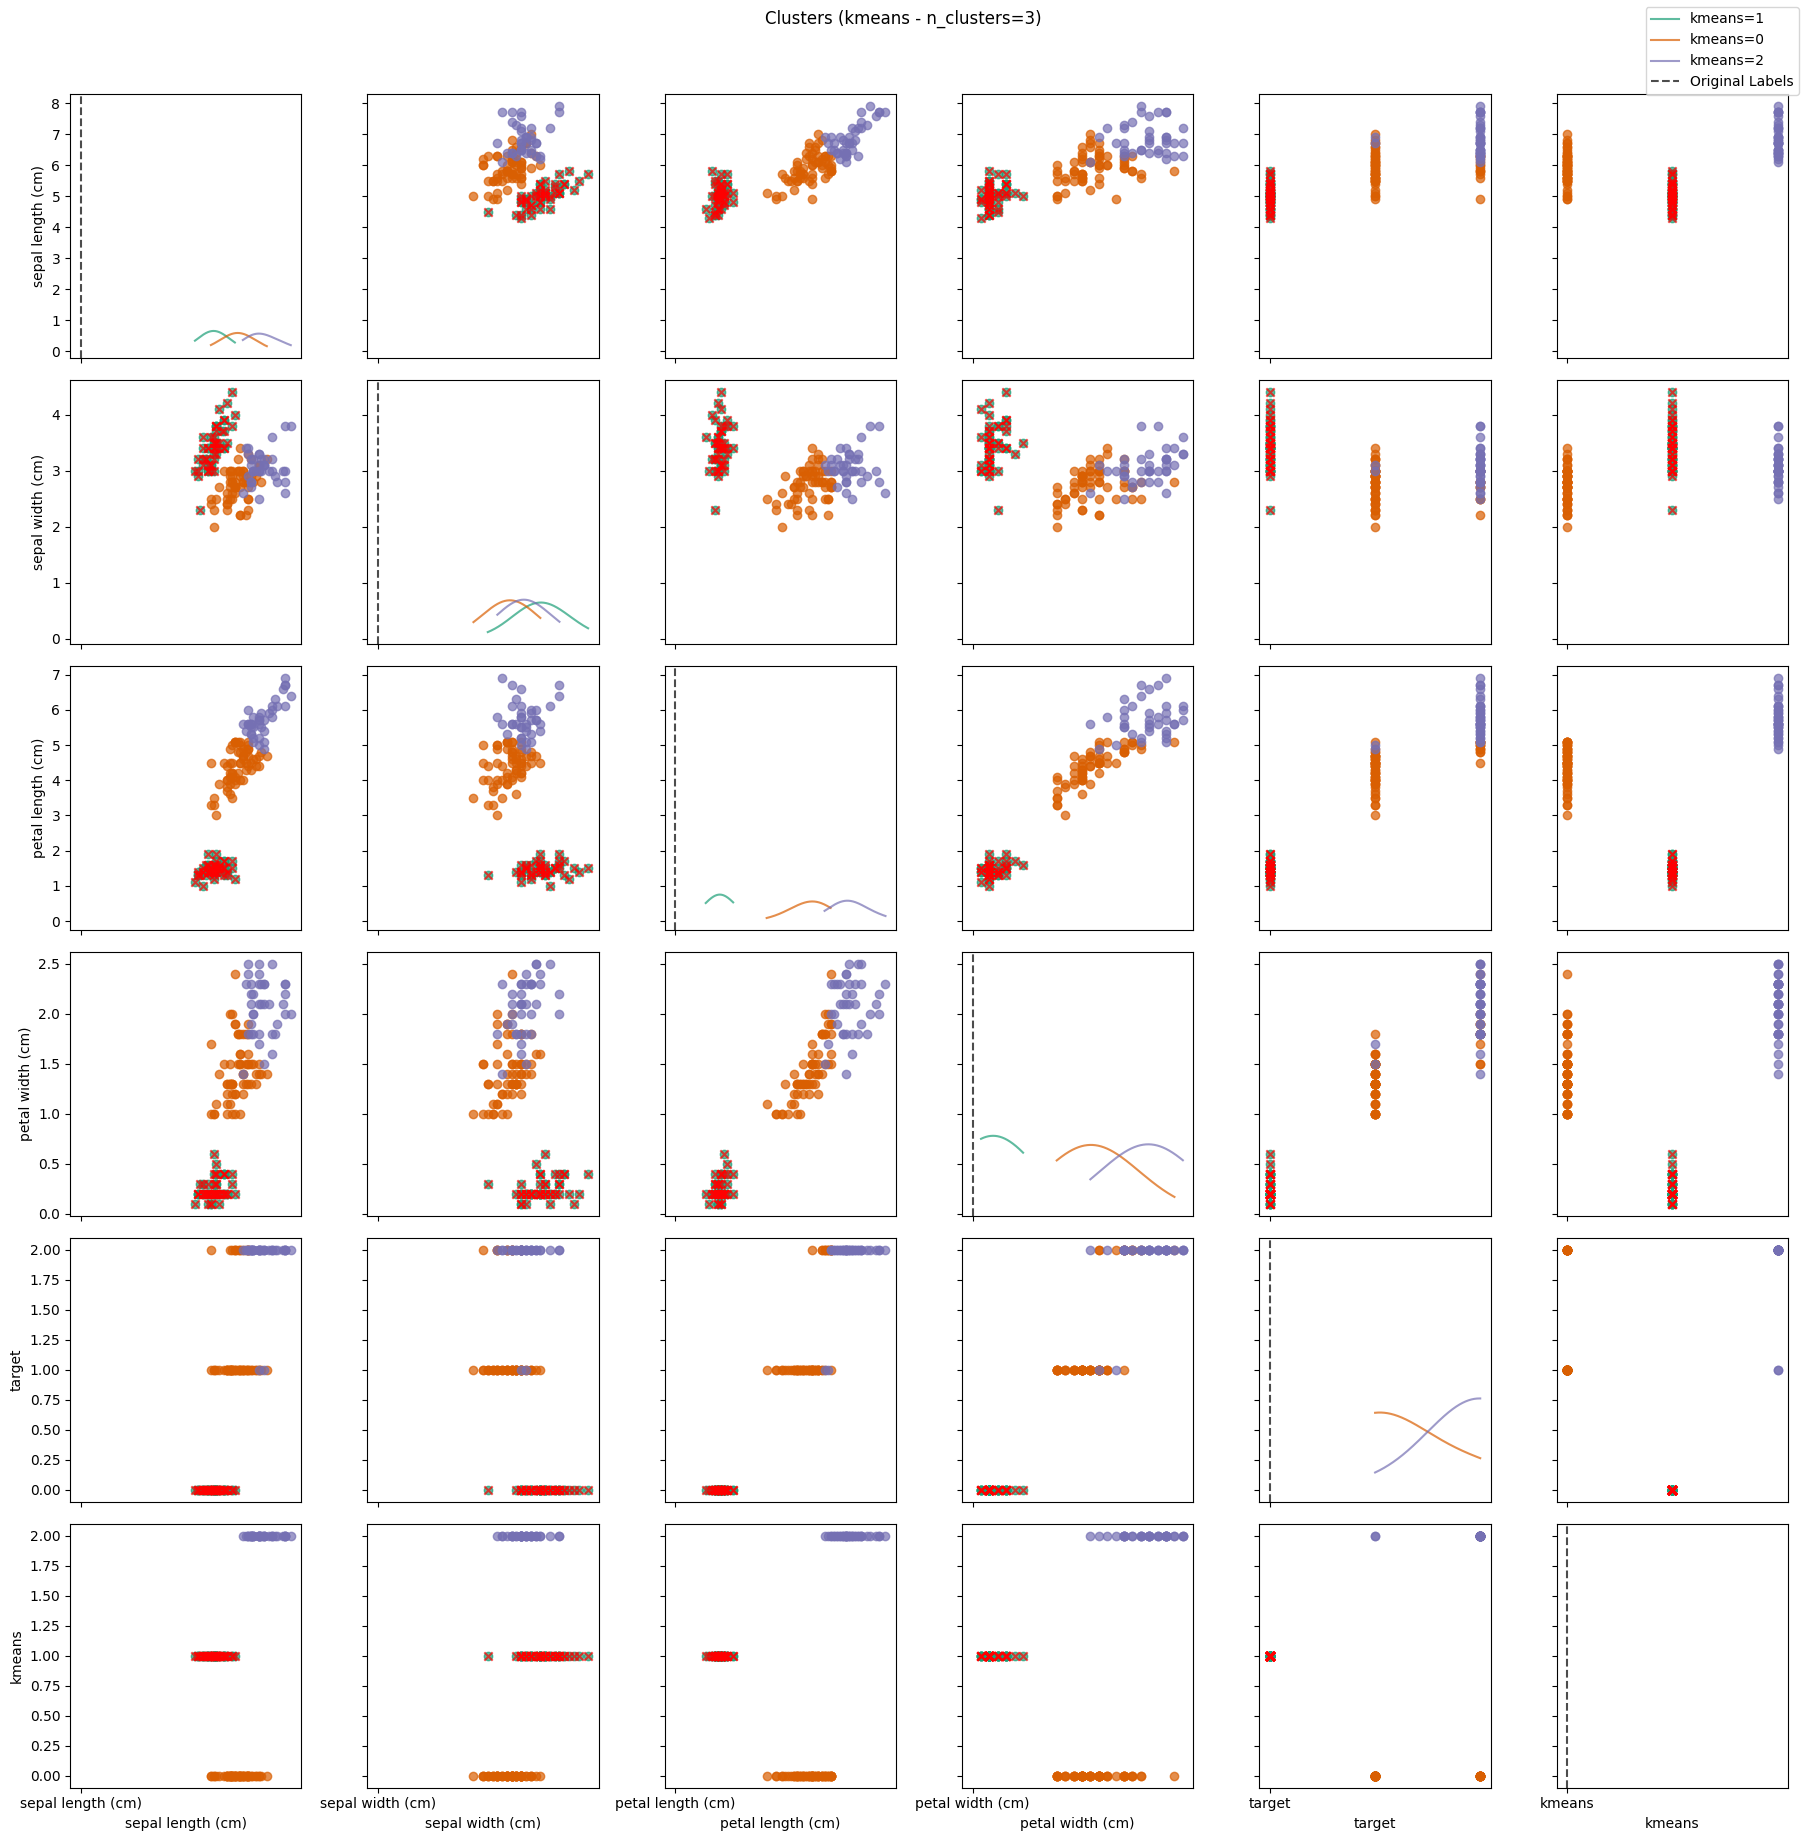

Evaluation for (kmeans) (n_clusters=3):
Silhouette Score: 0.5528190123564102
Calinski-Harabasz Index: 561.62775662962
Davies-Bouldin Index: 0.6619715465007465




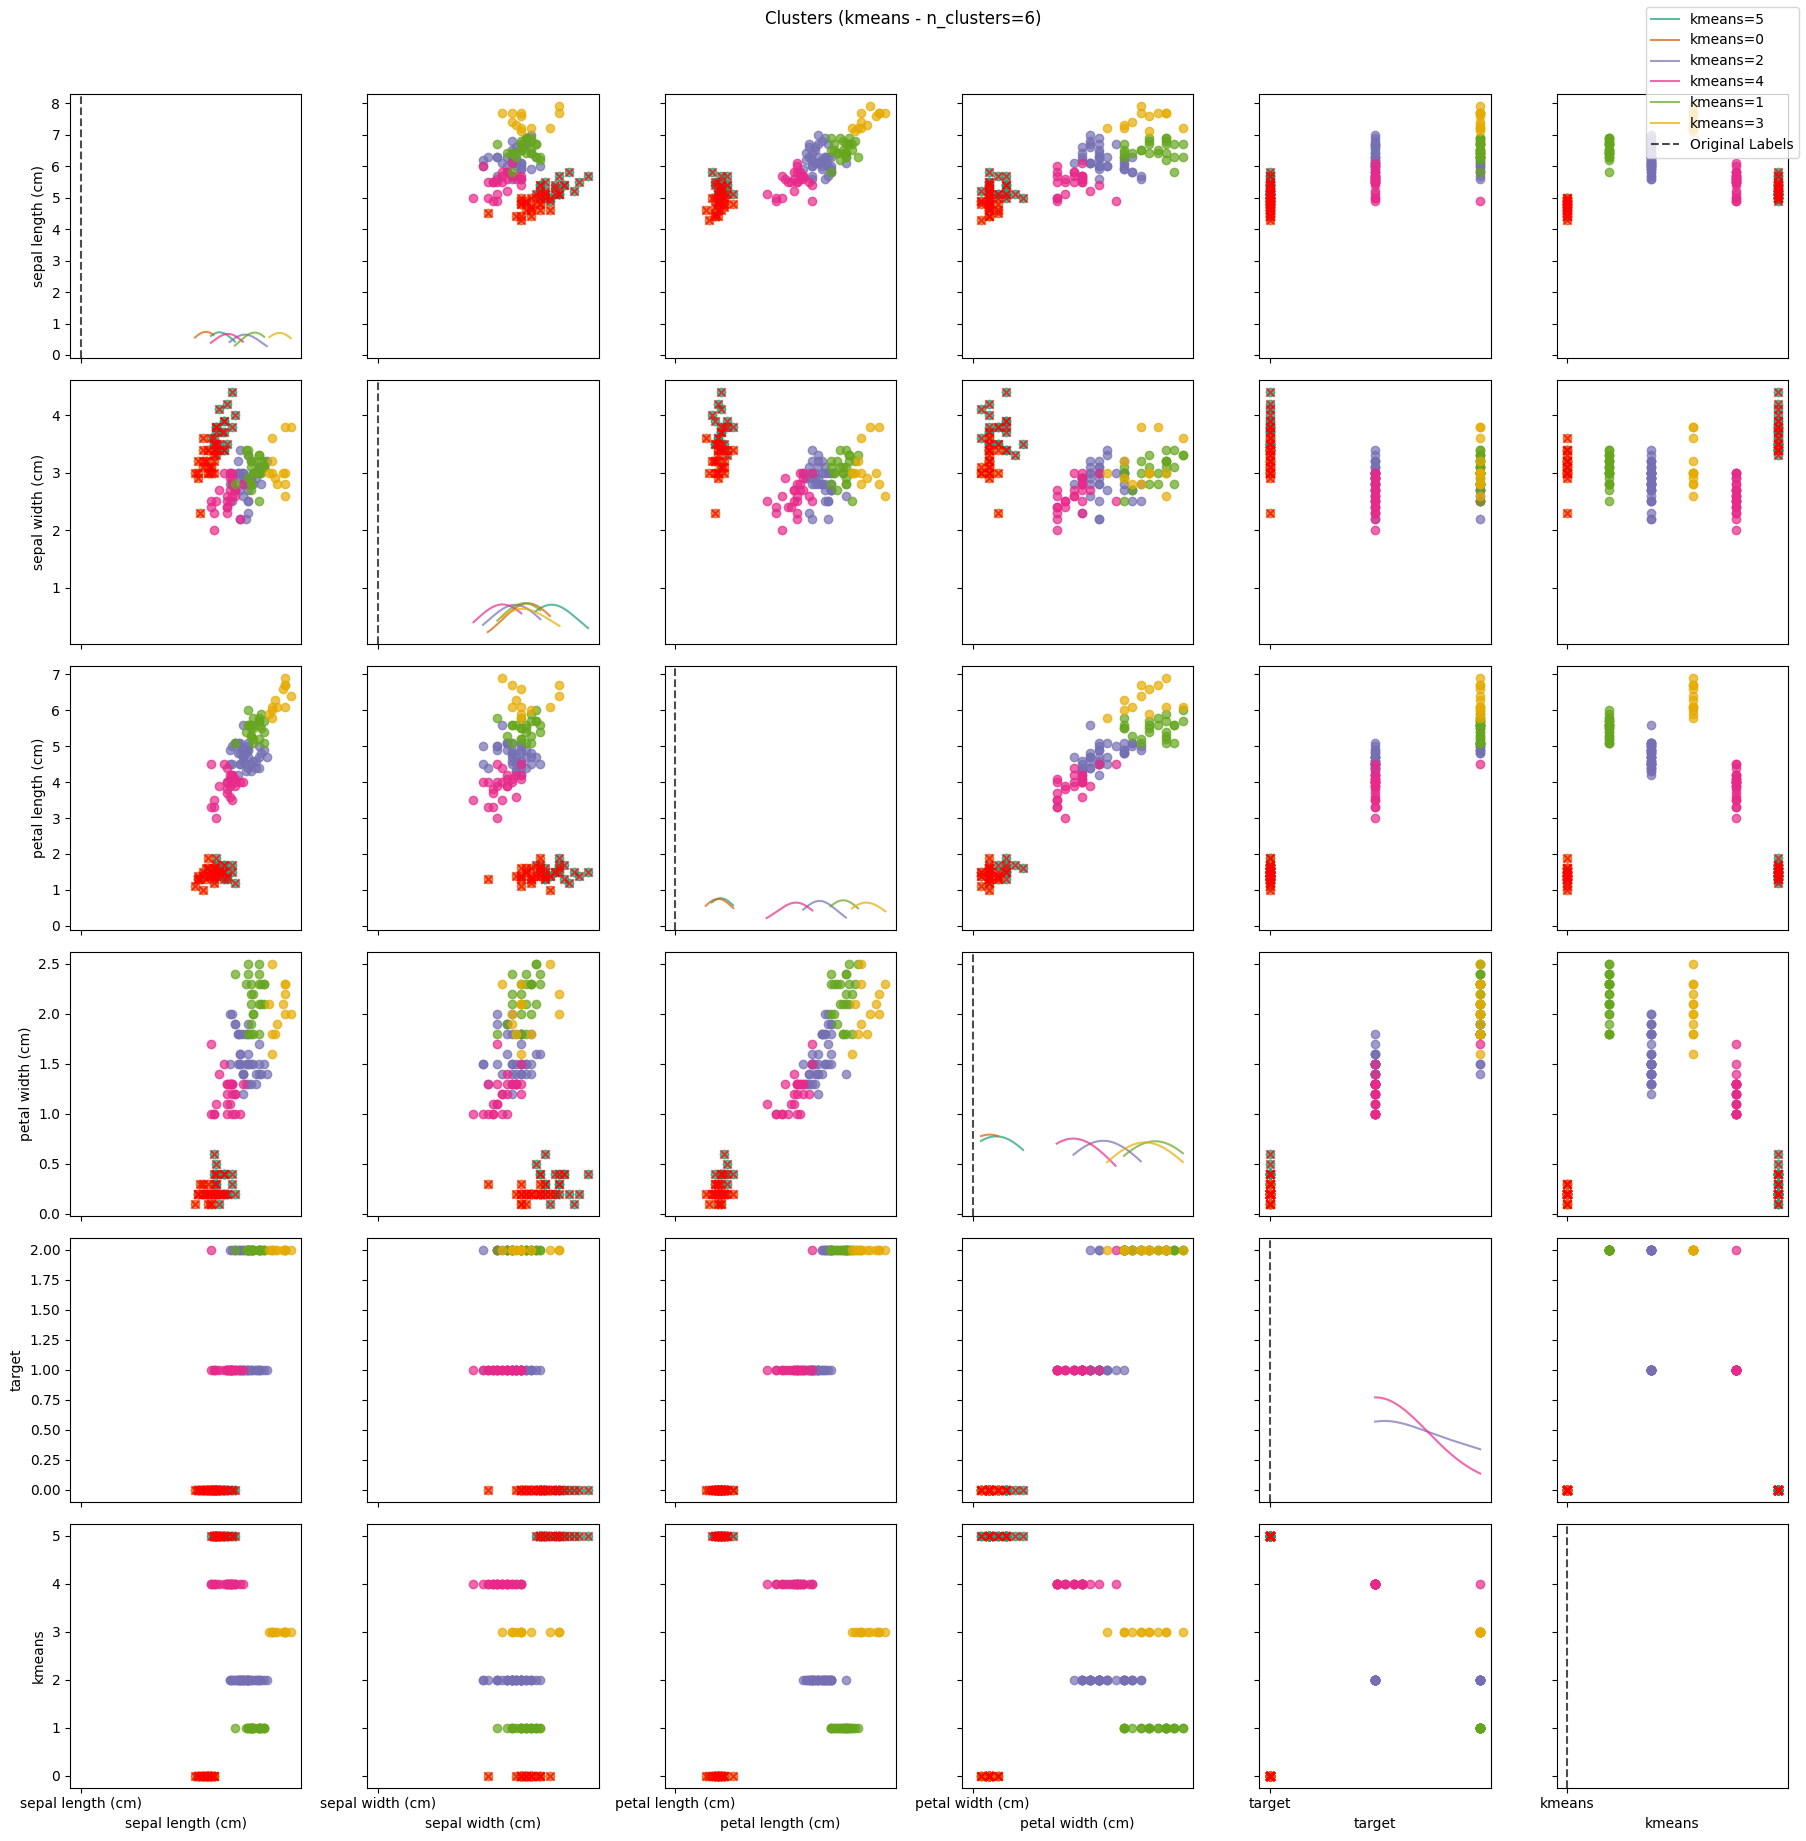

Evaluation for (kmeans) (n_clusters=6):
Silhouette Score: 0.36483400396700366
Calinski-Harabasz Index: 473.85060683304255
Davies-Bouldin Index: 0.9141579726538026




In [12]:
for n_clusters in [ 2, 3, 6]:
    df_exp = run_kmeans( main_df.copy(), n_clusters ) 
    plotar_clusters(  df_exp, 'kmeans', f'n_clusters={n_clusters}' )
    avaliar_clusters( df_exp, 'kmeans', f'n_clusters={n_clusters}' )

### Gaussian

In [13]:
from sklearn.mixture import GaussianMixture as GMM

In [14]:
def run_gaussmixm( df, num_components, covar_type ):
    gmm = GMM( n_components=num_components, covariance_type=covar_type, random_state=0 )
    df['gaussmix'] = gmm.fit_predict( df )

    return df

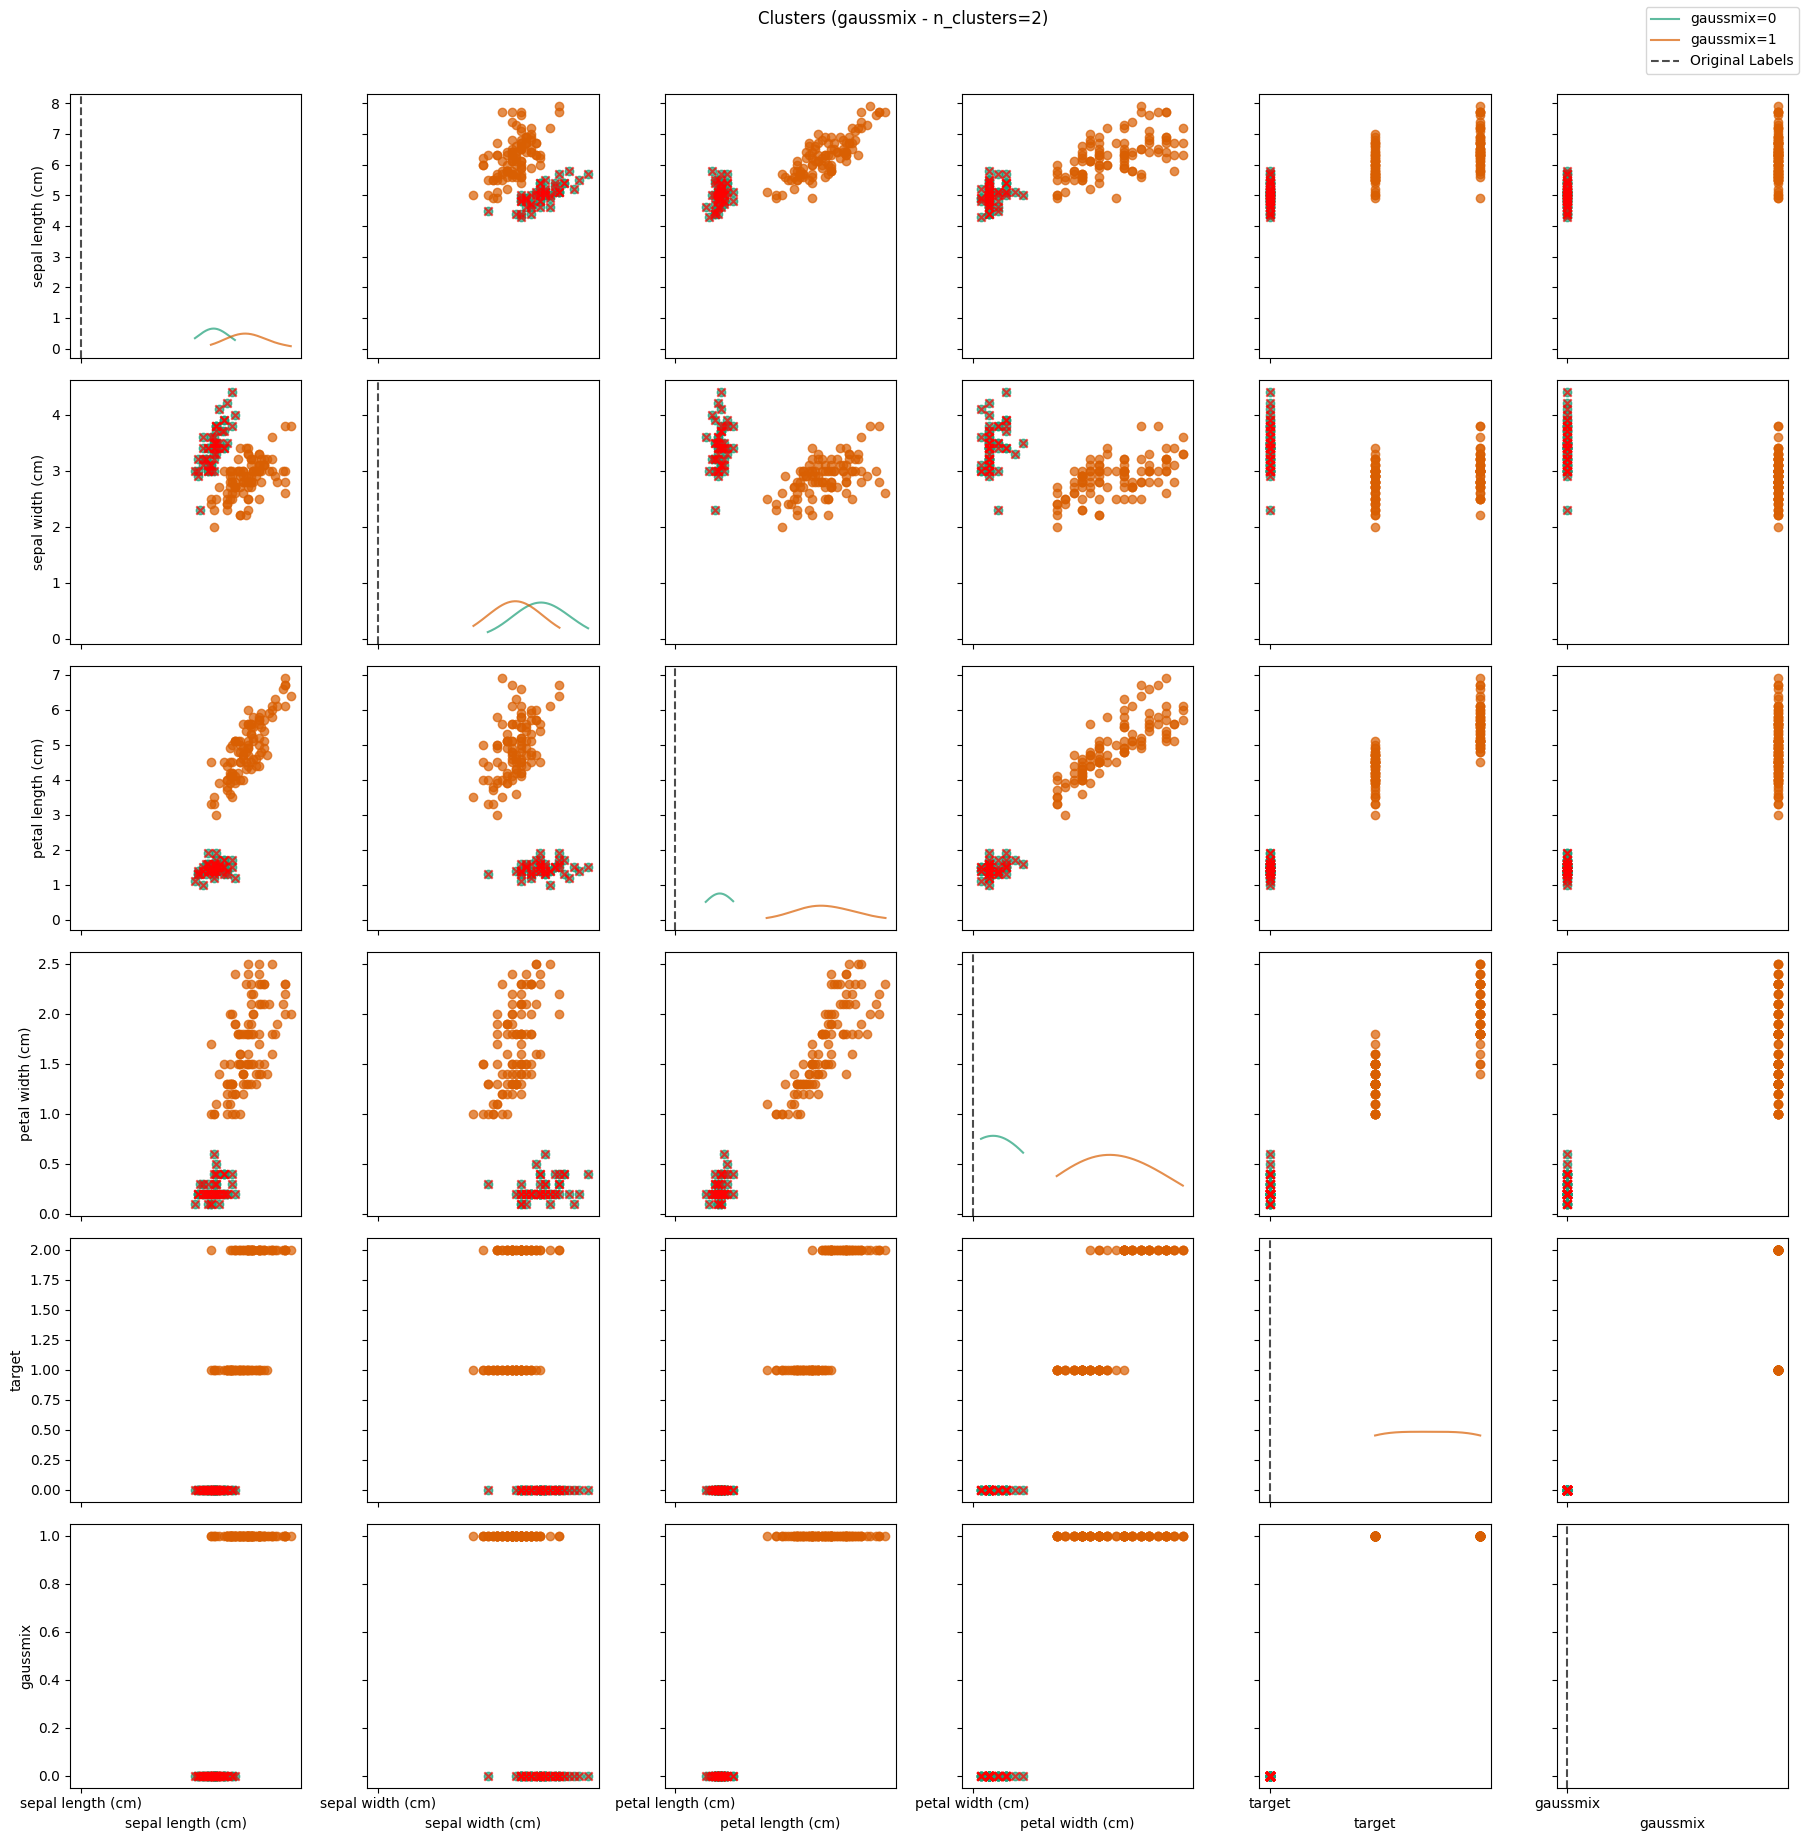

Evaluation for (gaussmix) (n_clusters=2):
Silhouette Score: 0.6867350732769781
Calinski-Harabasz Index: 502.82156350235897
Davies-Bouldin Index: 0.38275284210068616




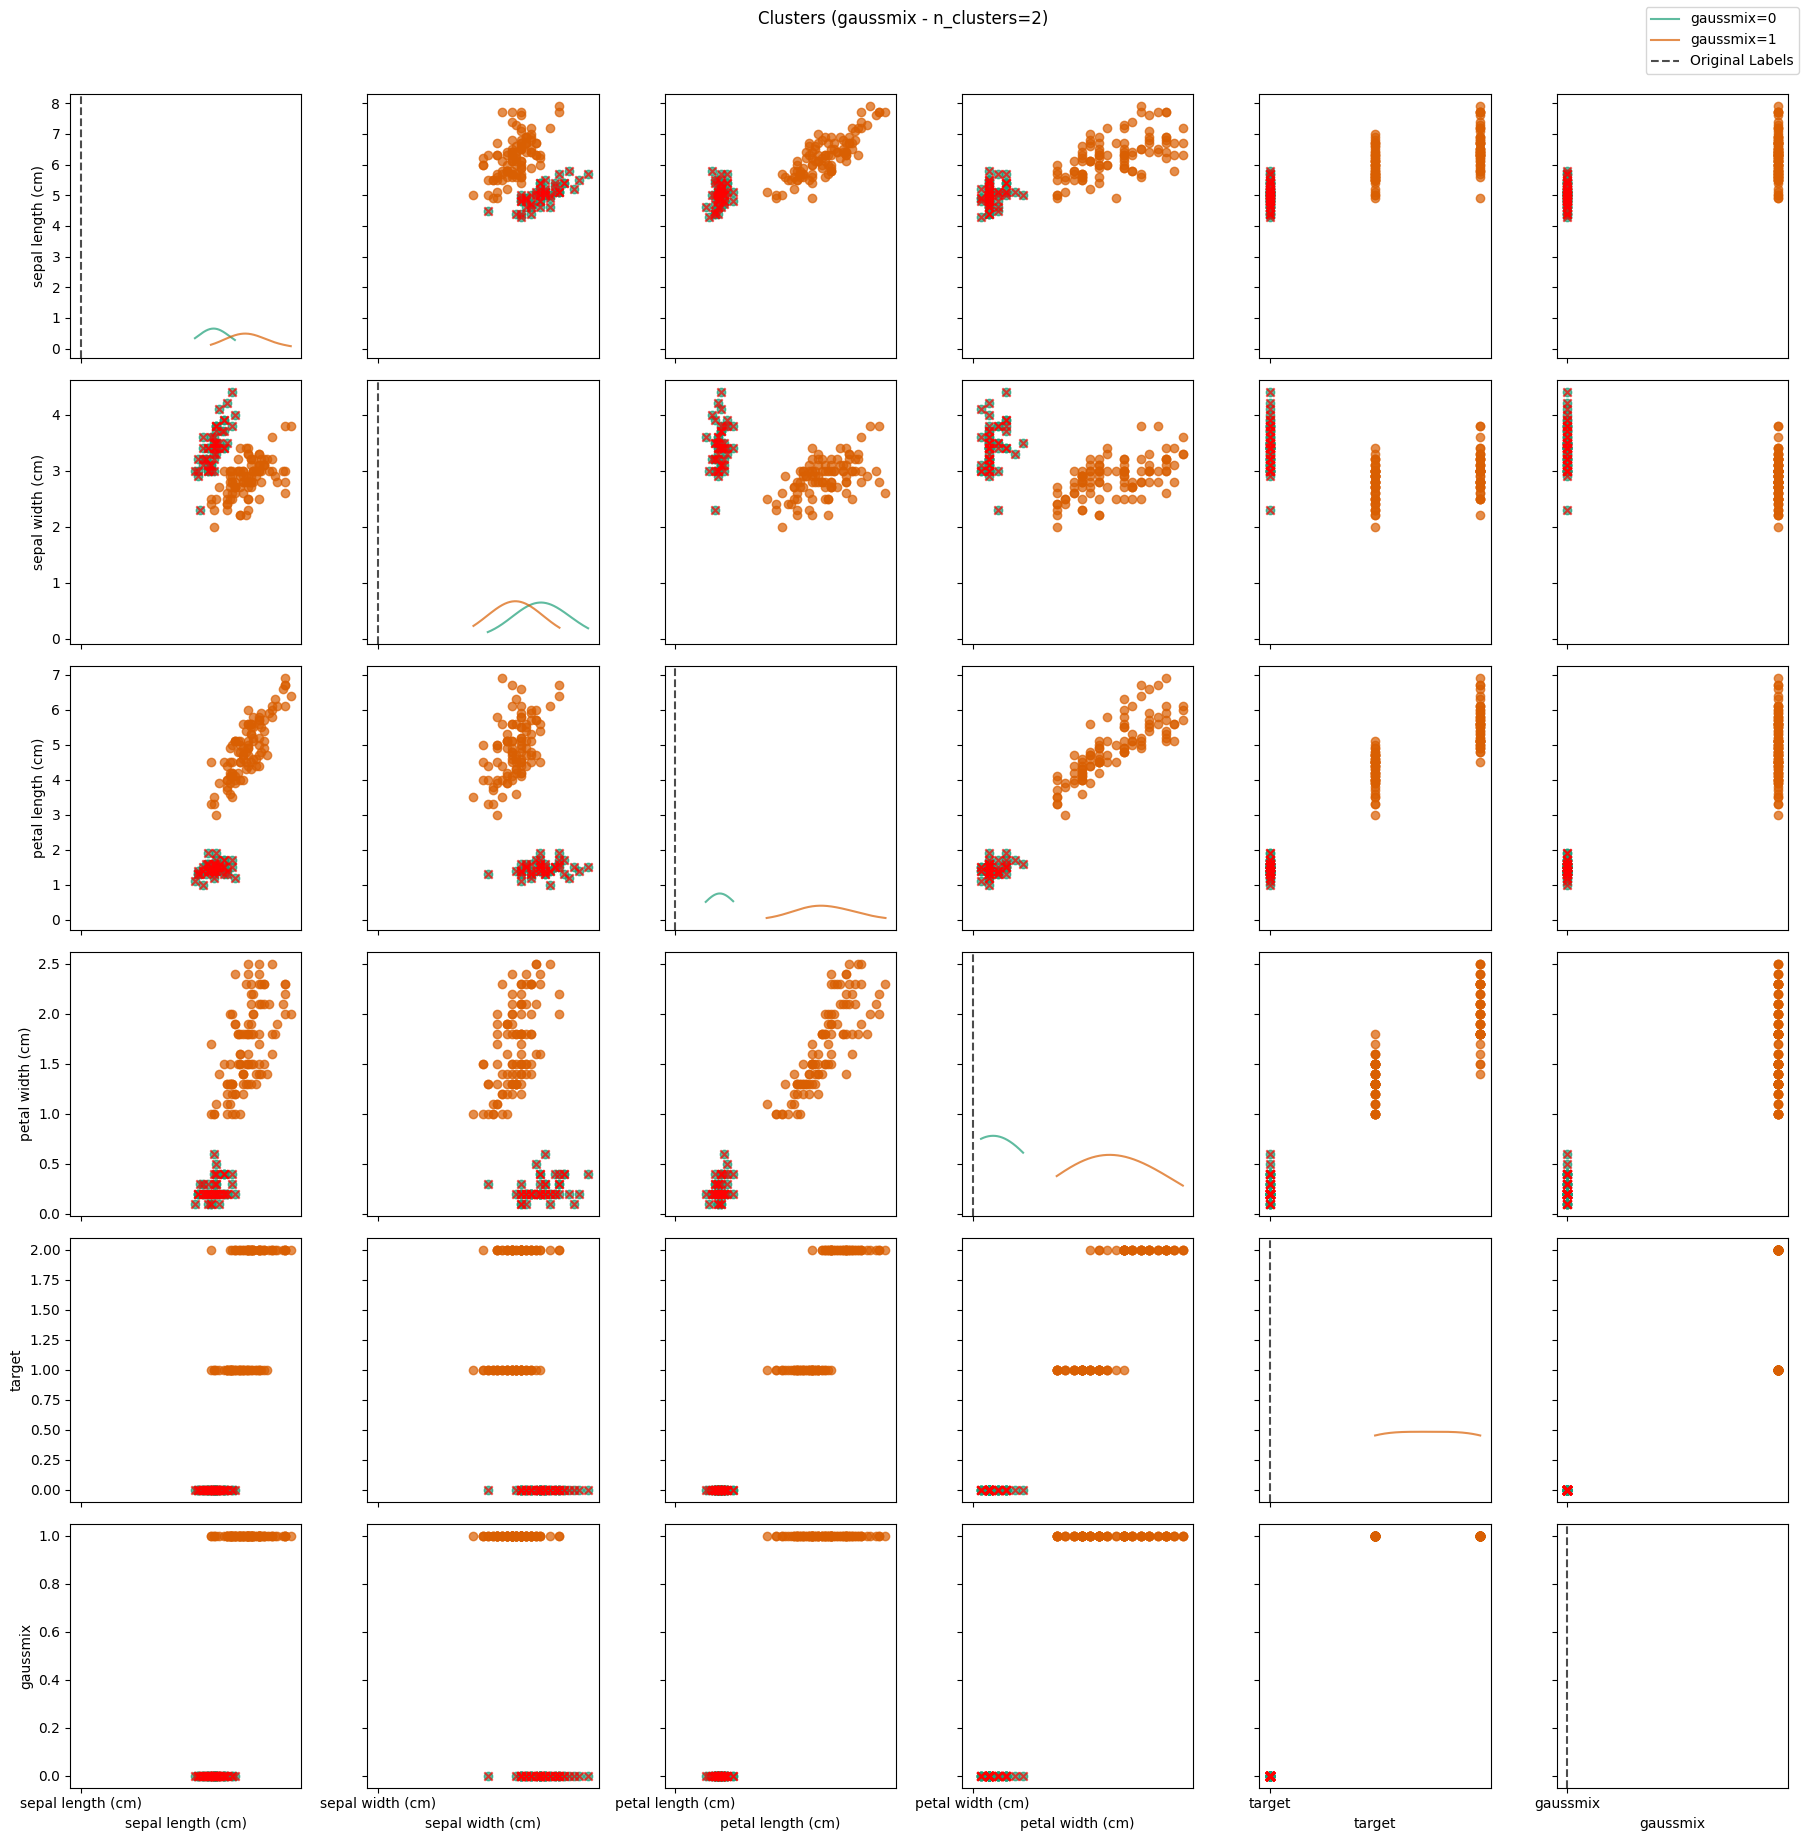

Evaluation for (gaussmix) (n_clusters=2):
Silhouette Score: 0.6867350732769781
Calinski-Harabasz Index: 502.82156350235897
Davies-Bouldin Index: 0.38275284210068616




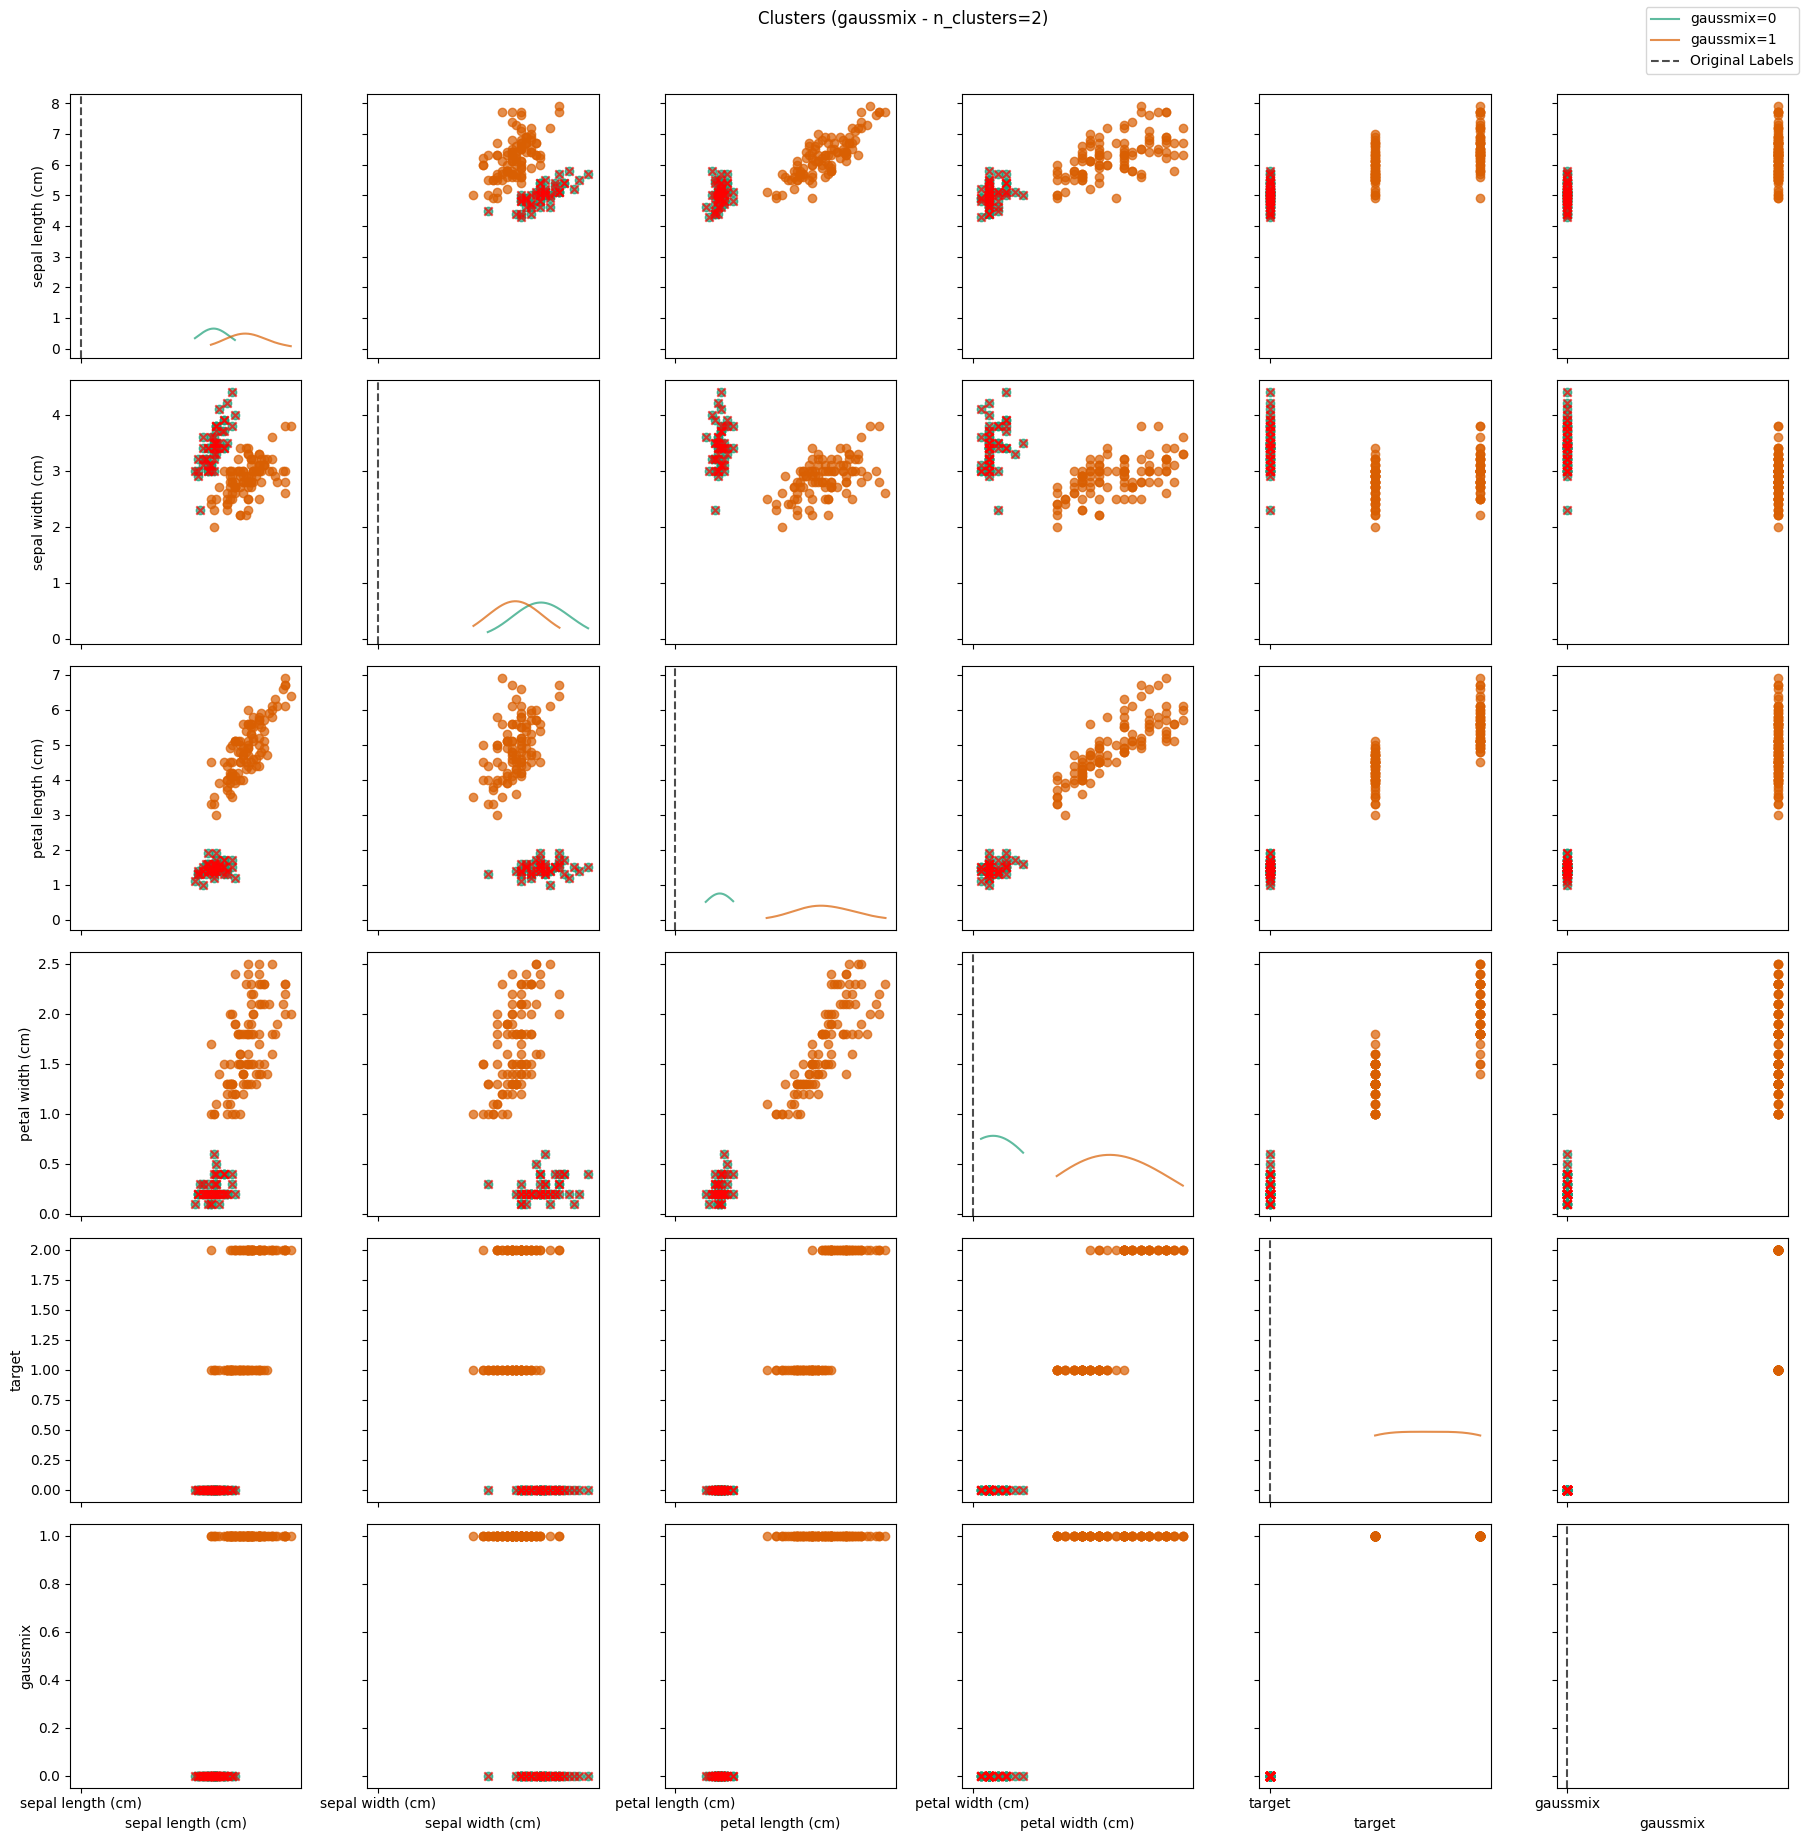

Evaluation for (gaussmix) (n_clusters=2):
Silhouette Score: 0.6867350732769781
Calinski-Harabasz Index: 502.82156350235897
Davies-Bouldin Index: 0.38275284210068616




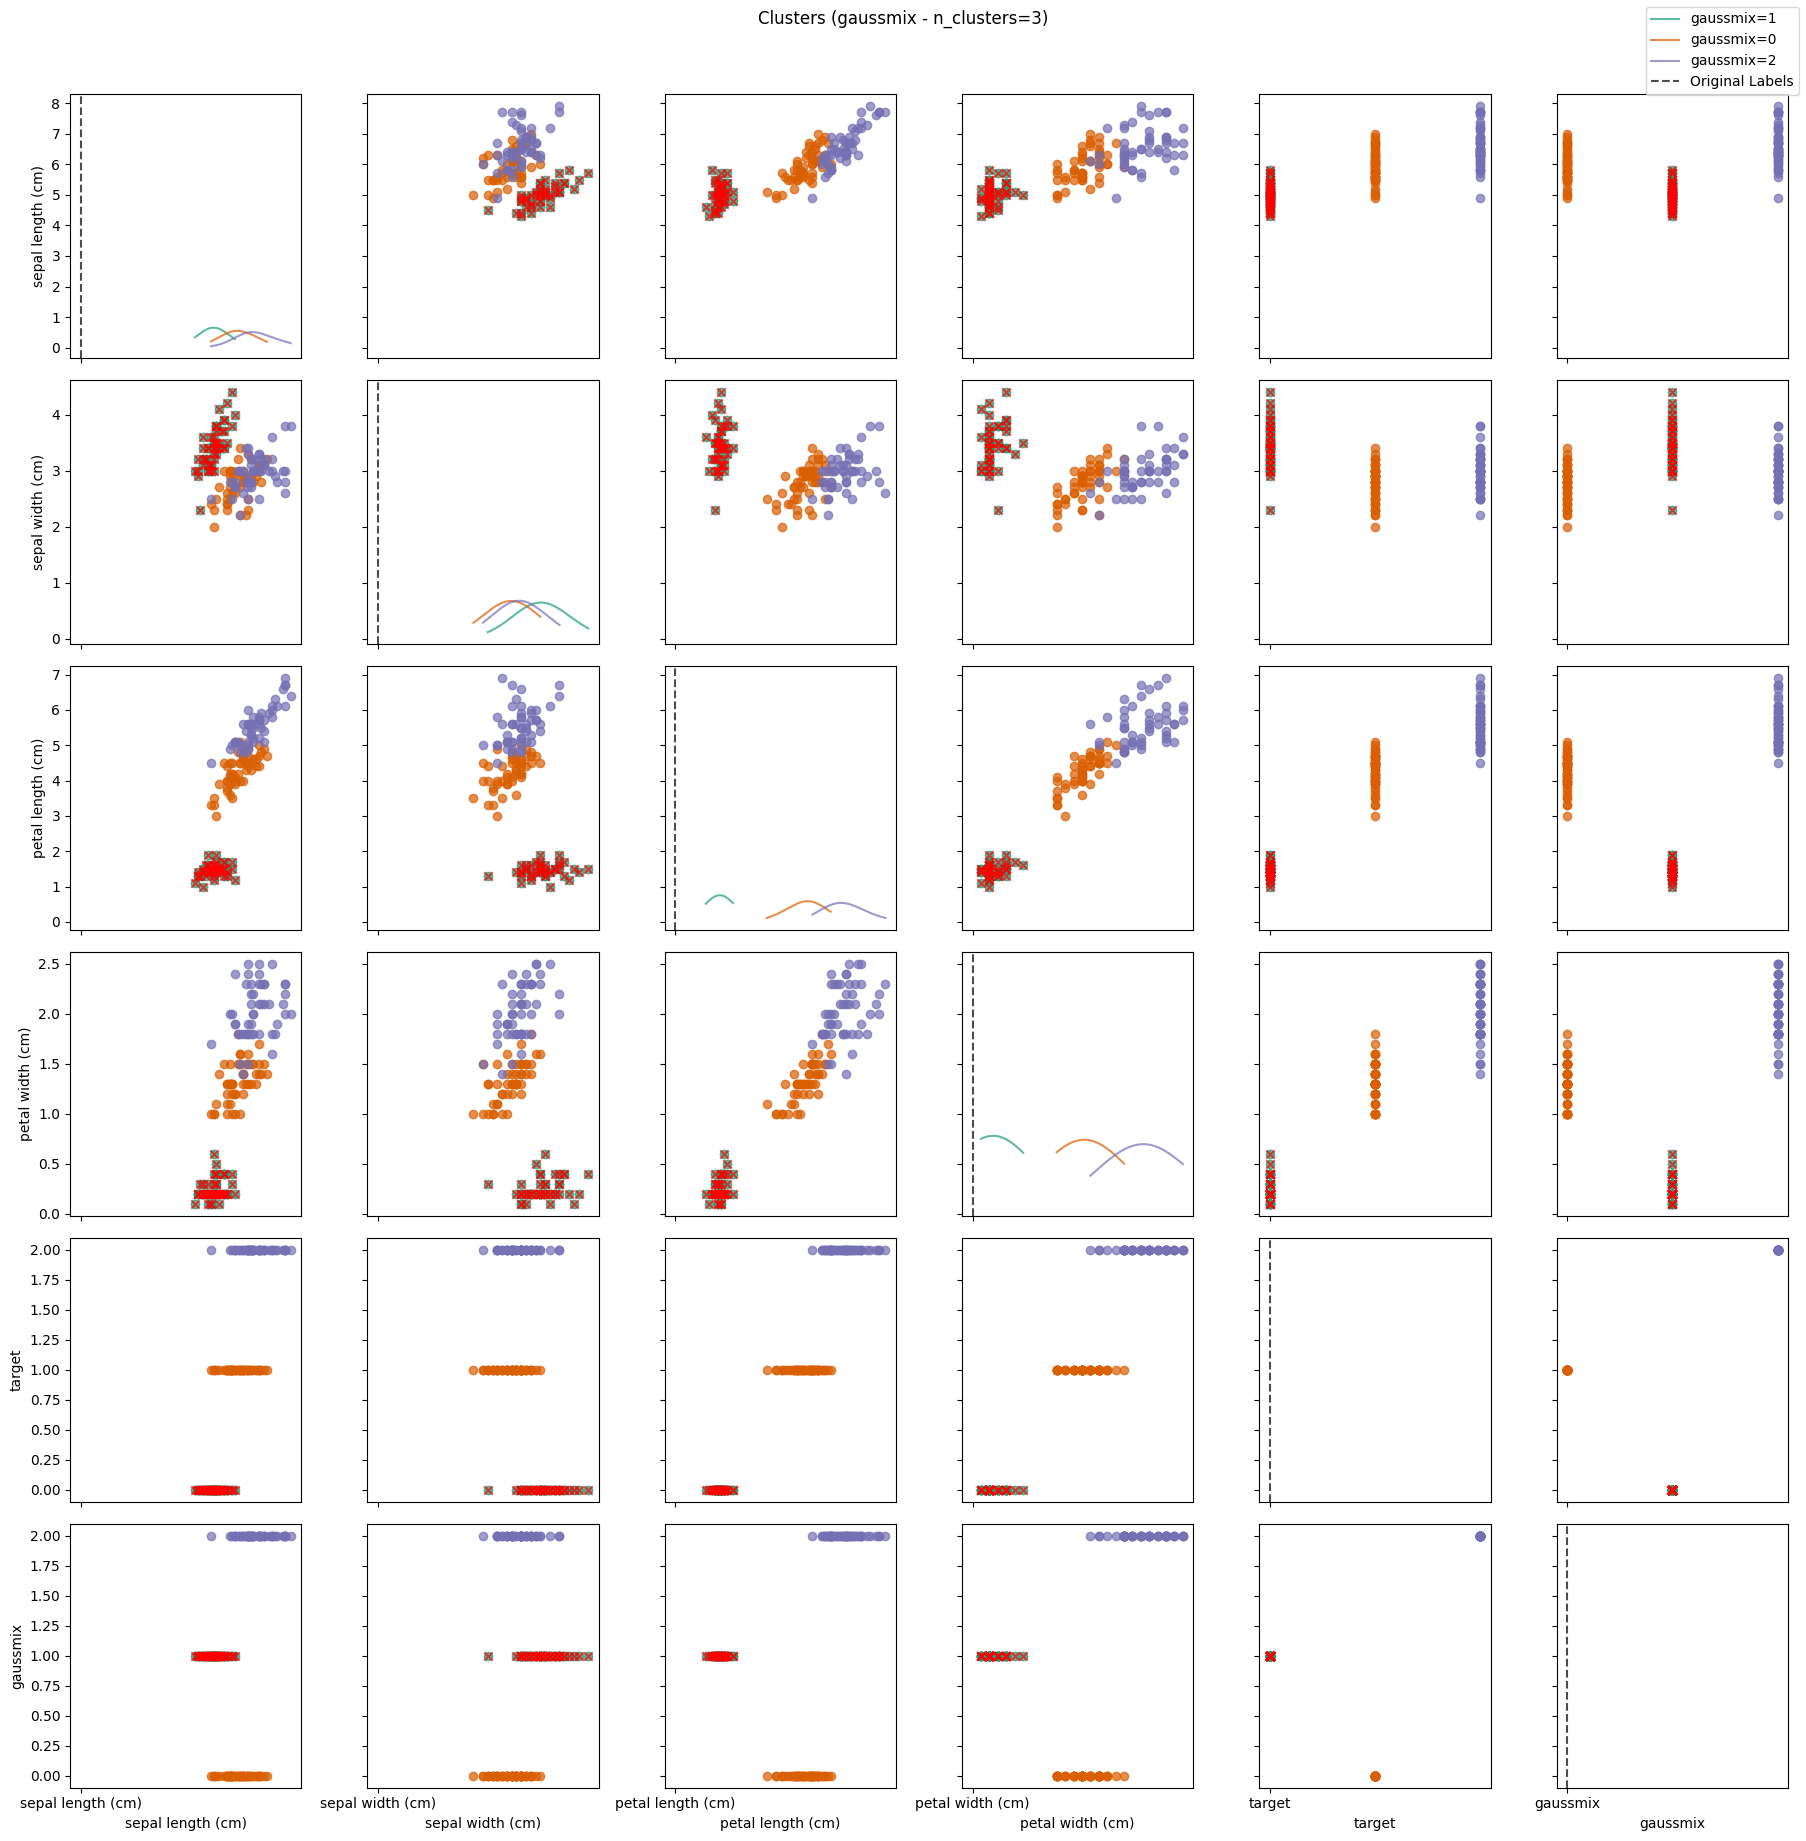

Evaluation for (gaussmix) (n_clusters=3):
Silhouette Score: 0.5034774406932966
Calinski-Harabasz Index: 487.33087637489984
Davies-Bouldin Index: 0.7513707094756737




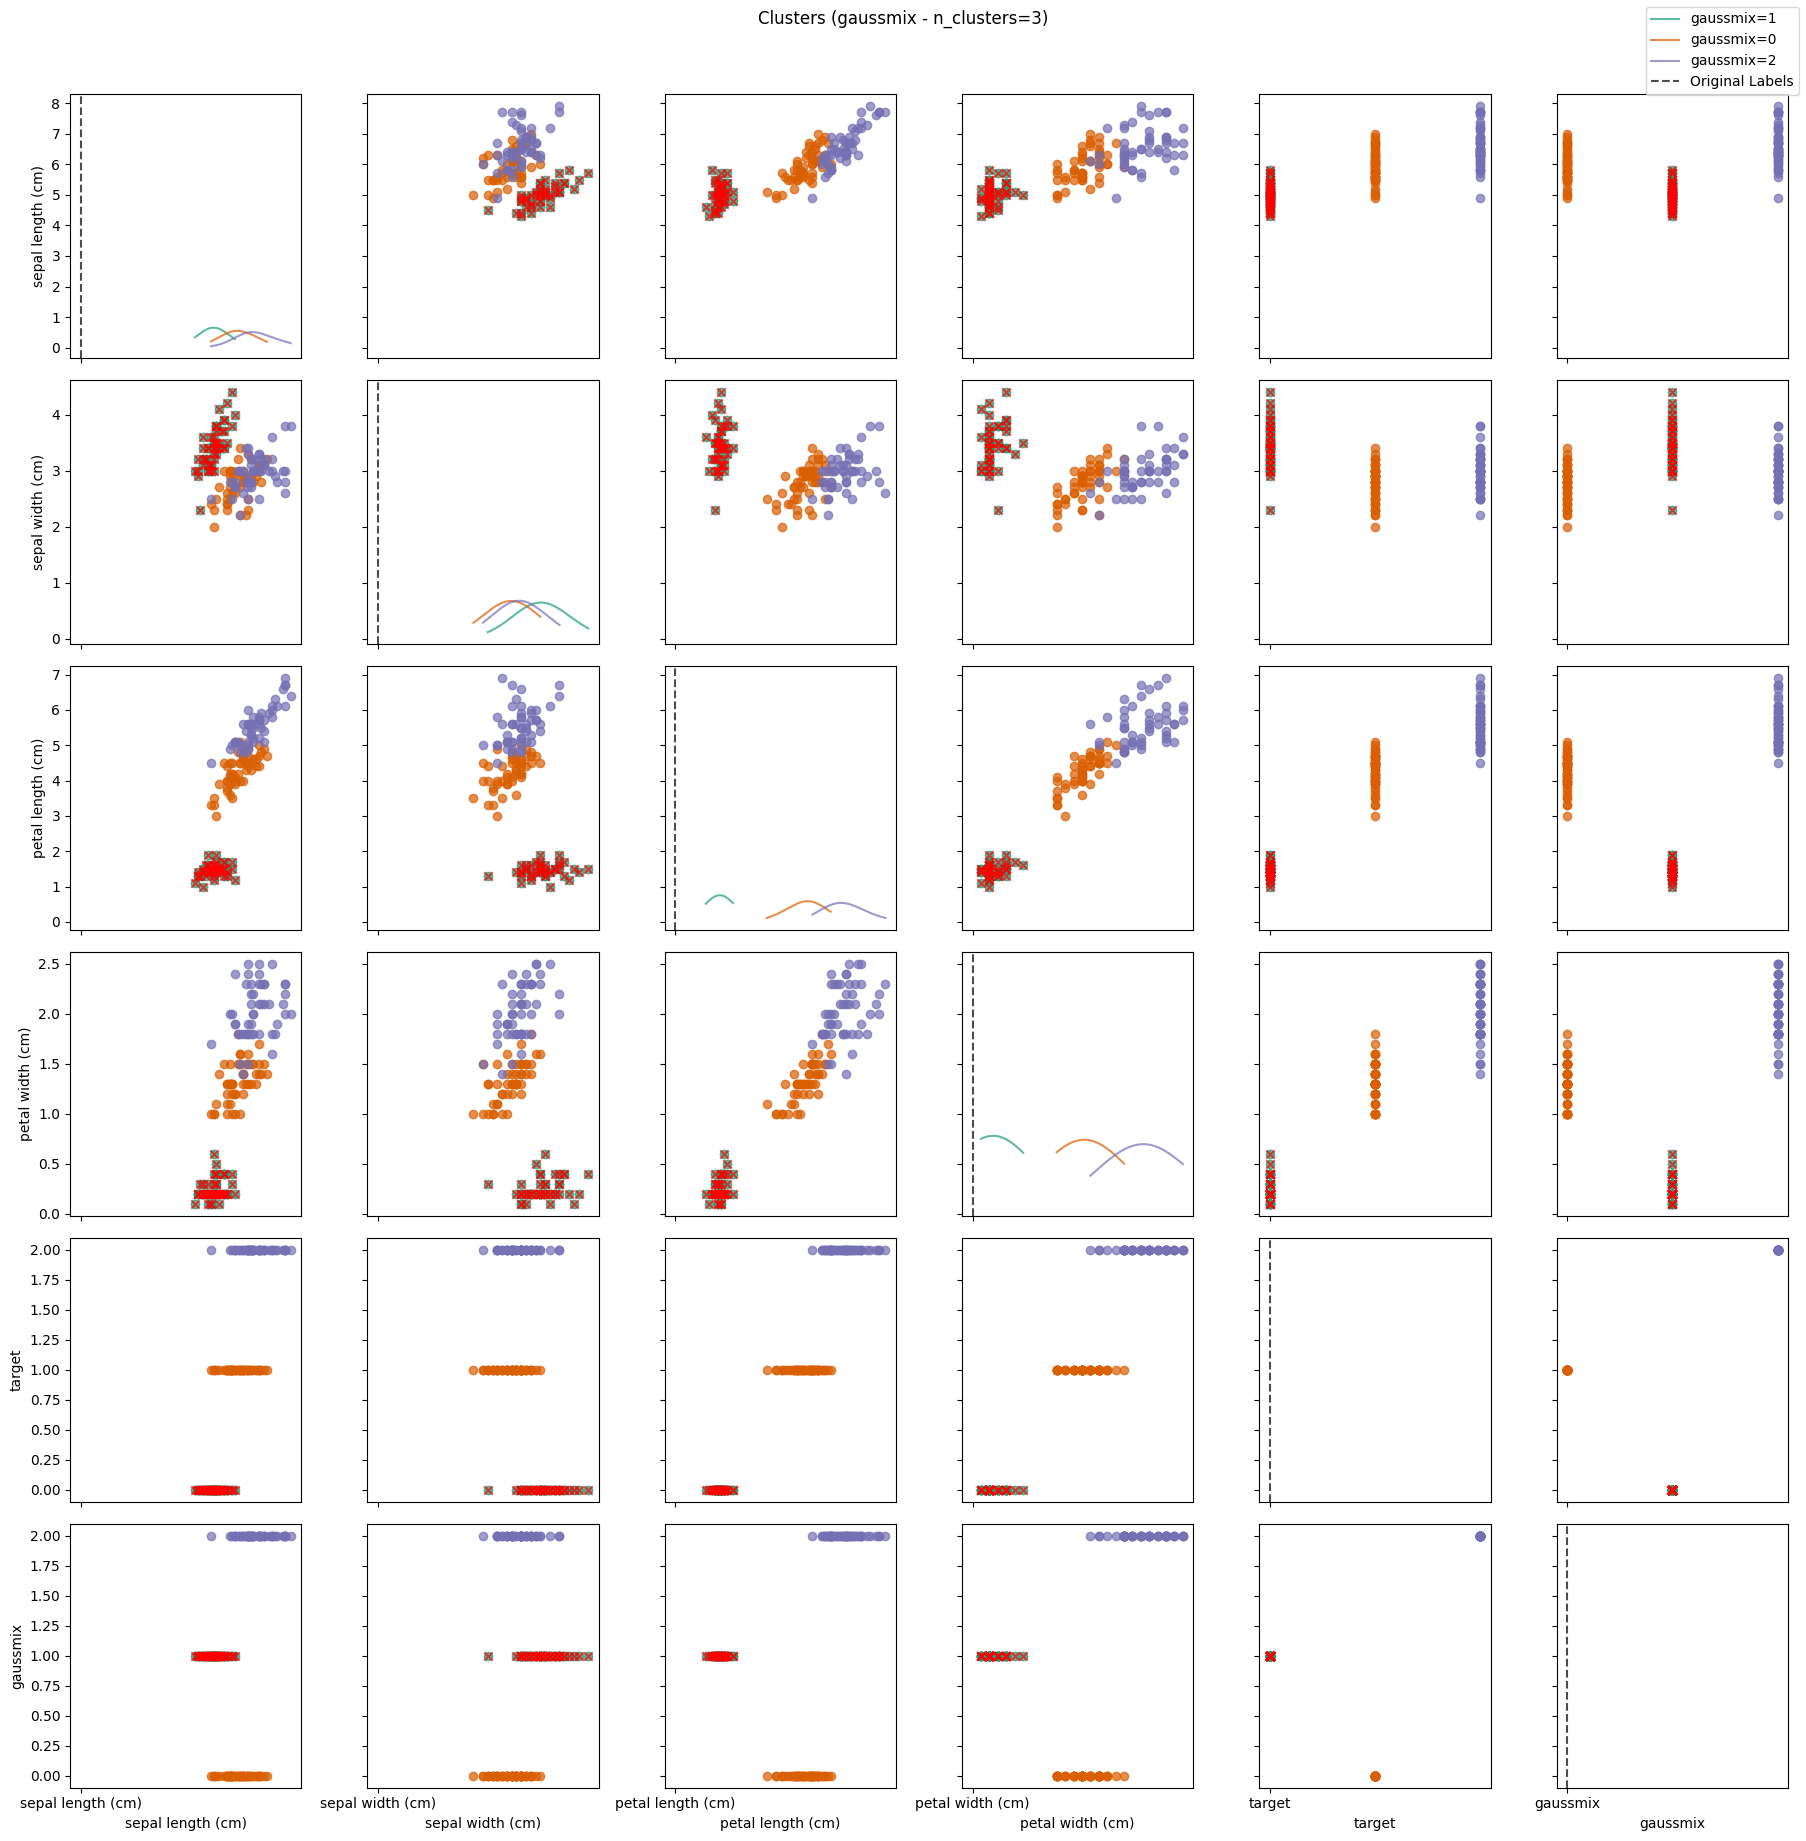

Evaluation for (gaussmix) (n_clusters=3):
Silhouette Score: 0.5034774406932966
Calinski-Harabasz Index: 487.33087637489984
Davies-Bouldin Index: 0.7513707094756737




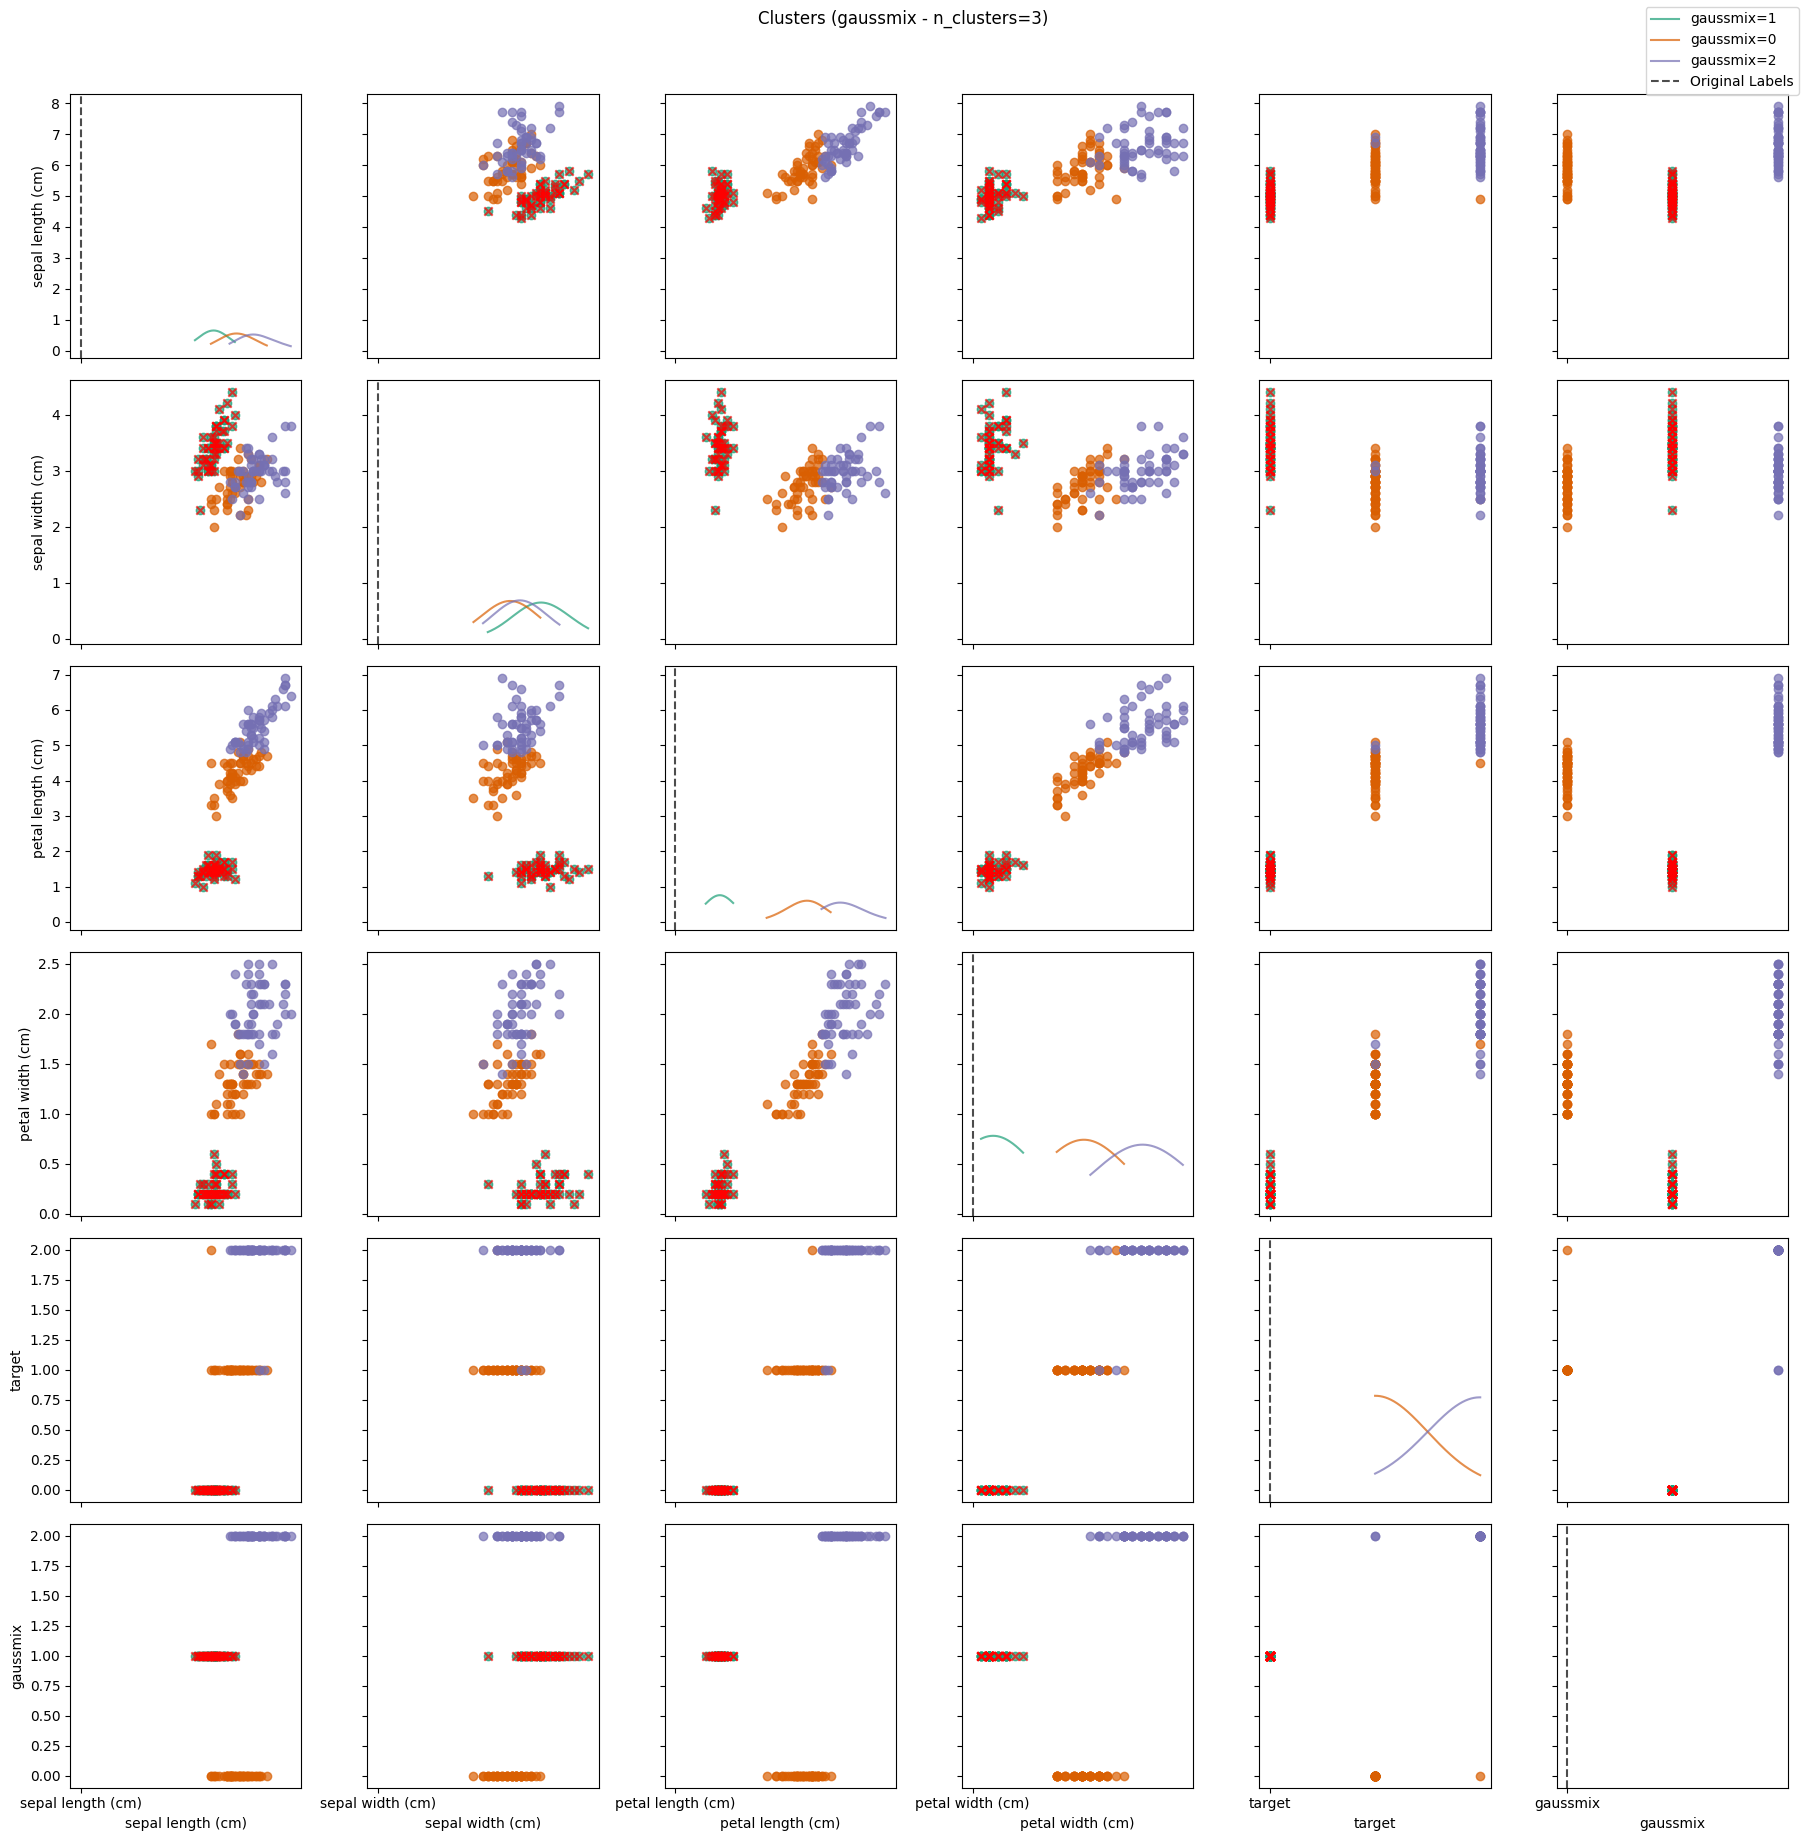

Evaluation for (gaussmix) (n_clusters=3):
Silhouette Score: 0.5172935760922516
Calinski-Harabasz Index: 519.2206202797411
Davies-Bouldin Index: 0.7146586425737335




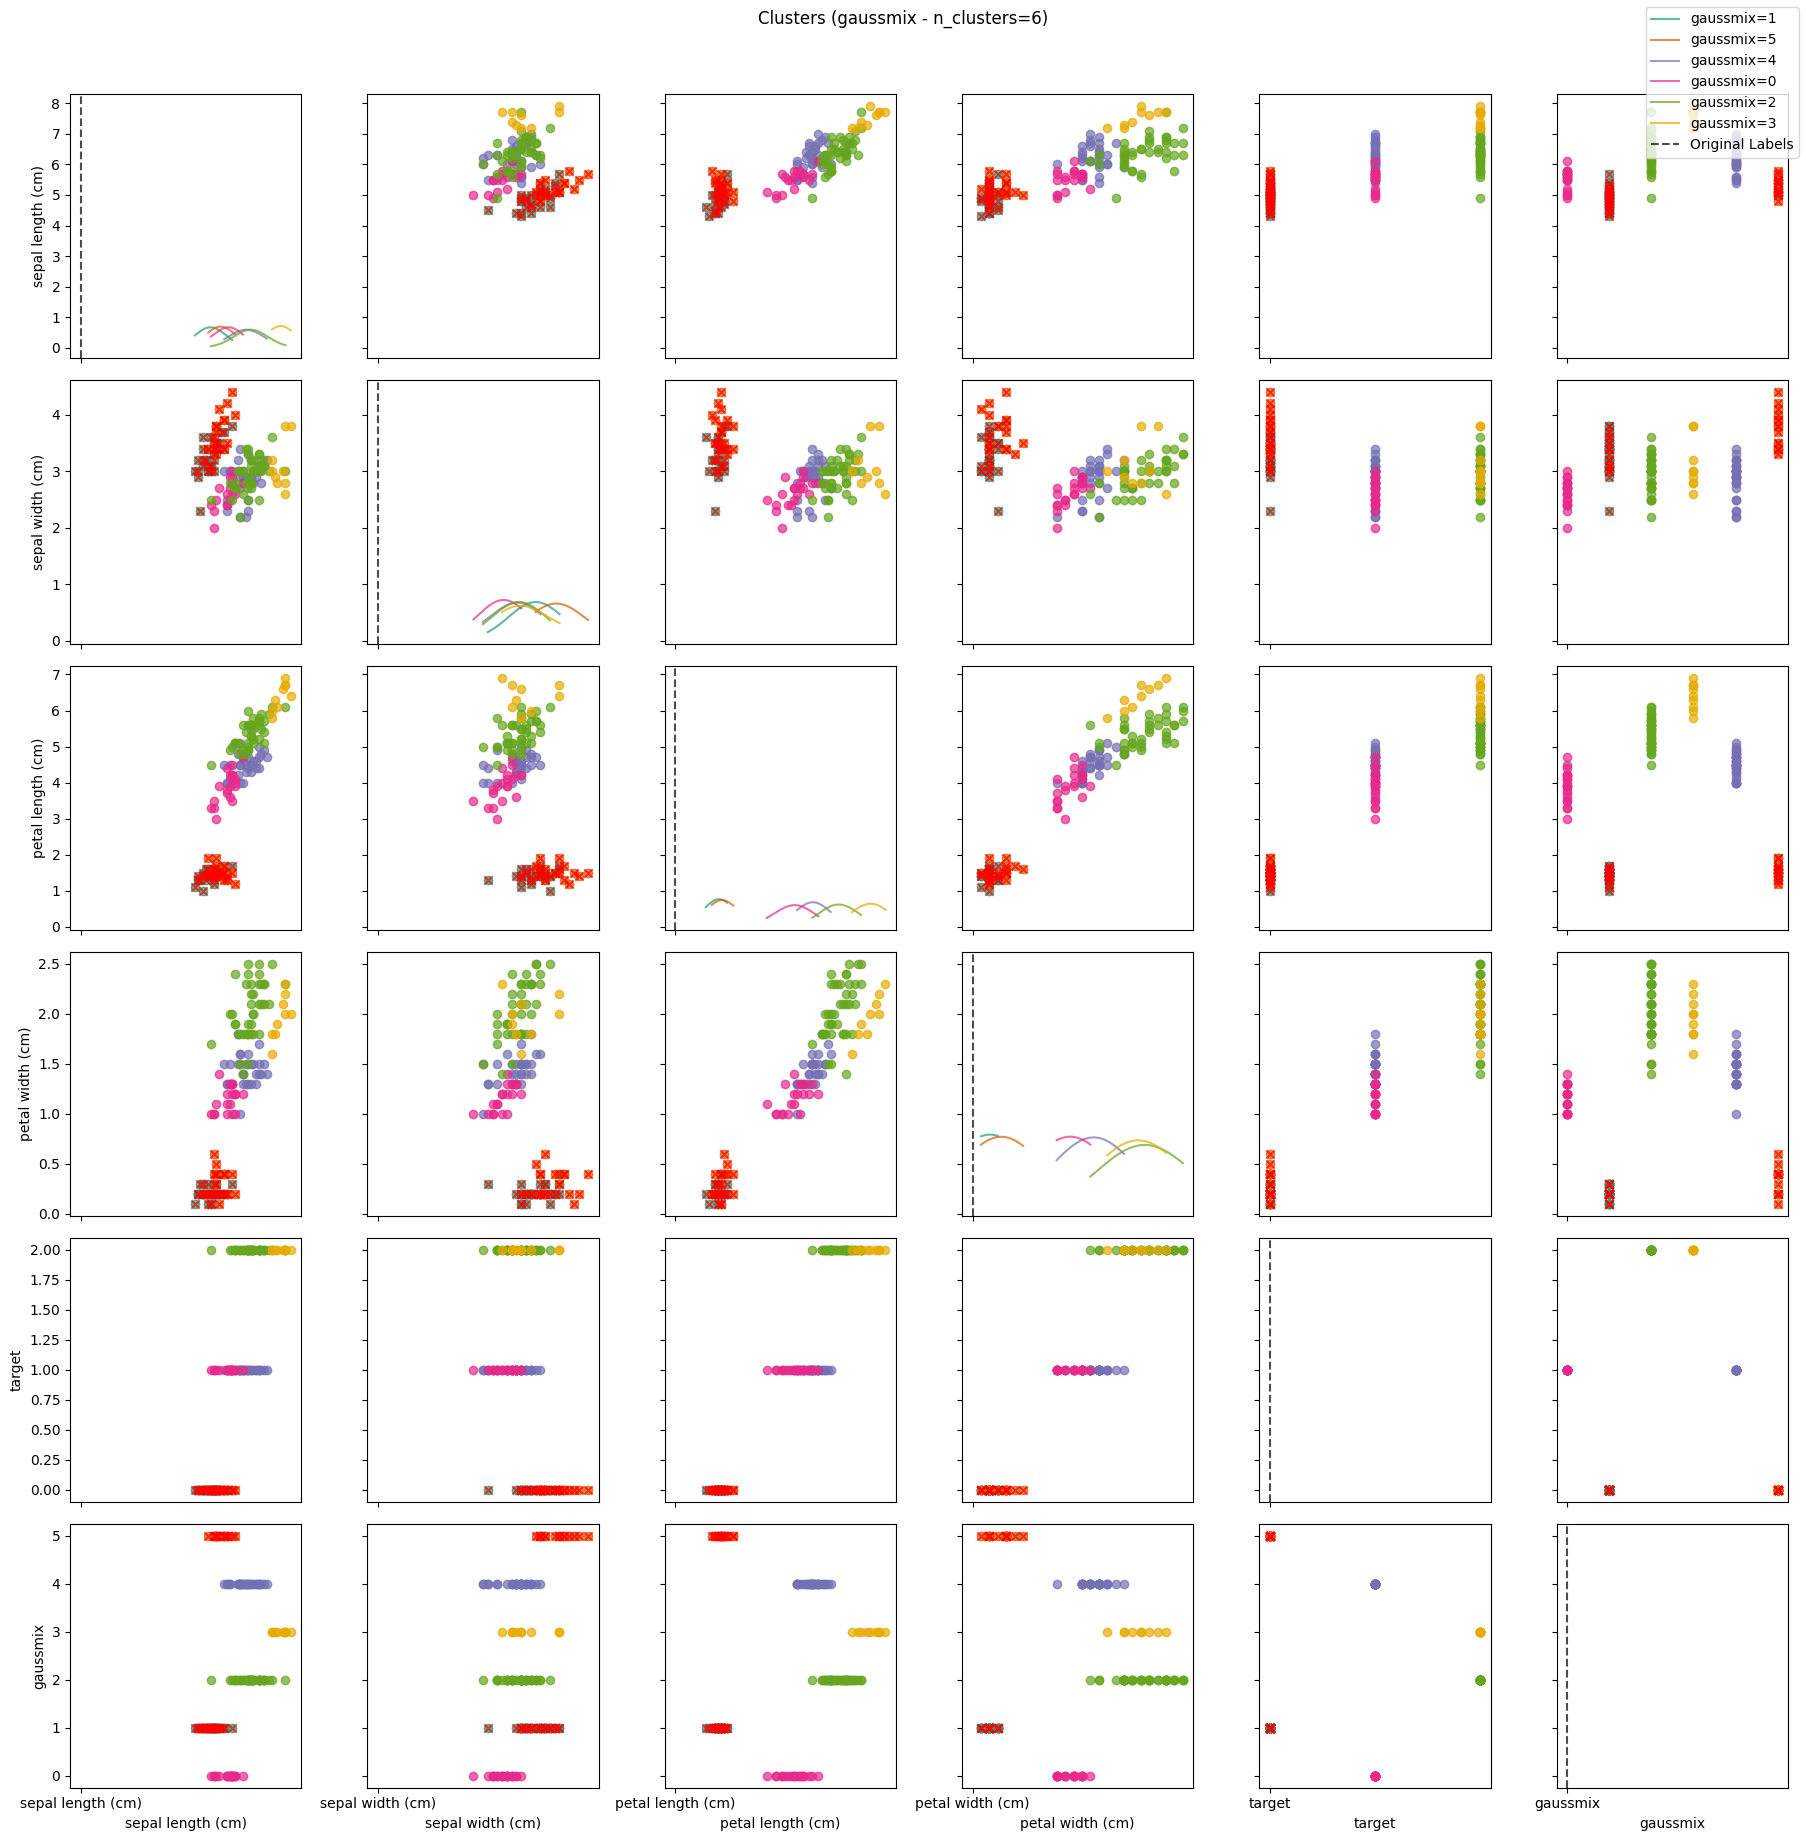

Evaluation for (gaussmix) (n_clusters=6):
Silhouette Score: 0.22330968376198135
Calinski-Harabasz Index: 322.96595549717944
Davies-Bouldin Index: 1.1702275930387882




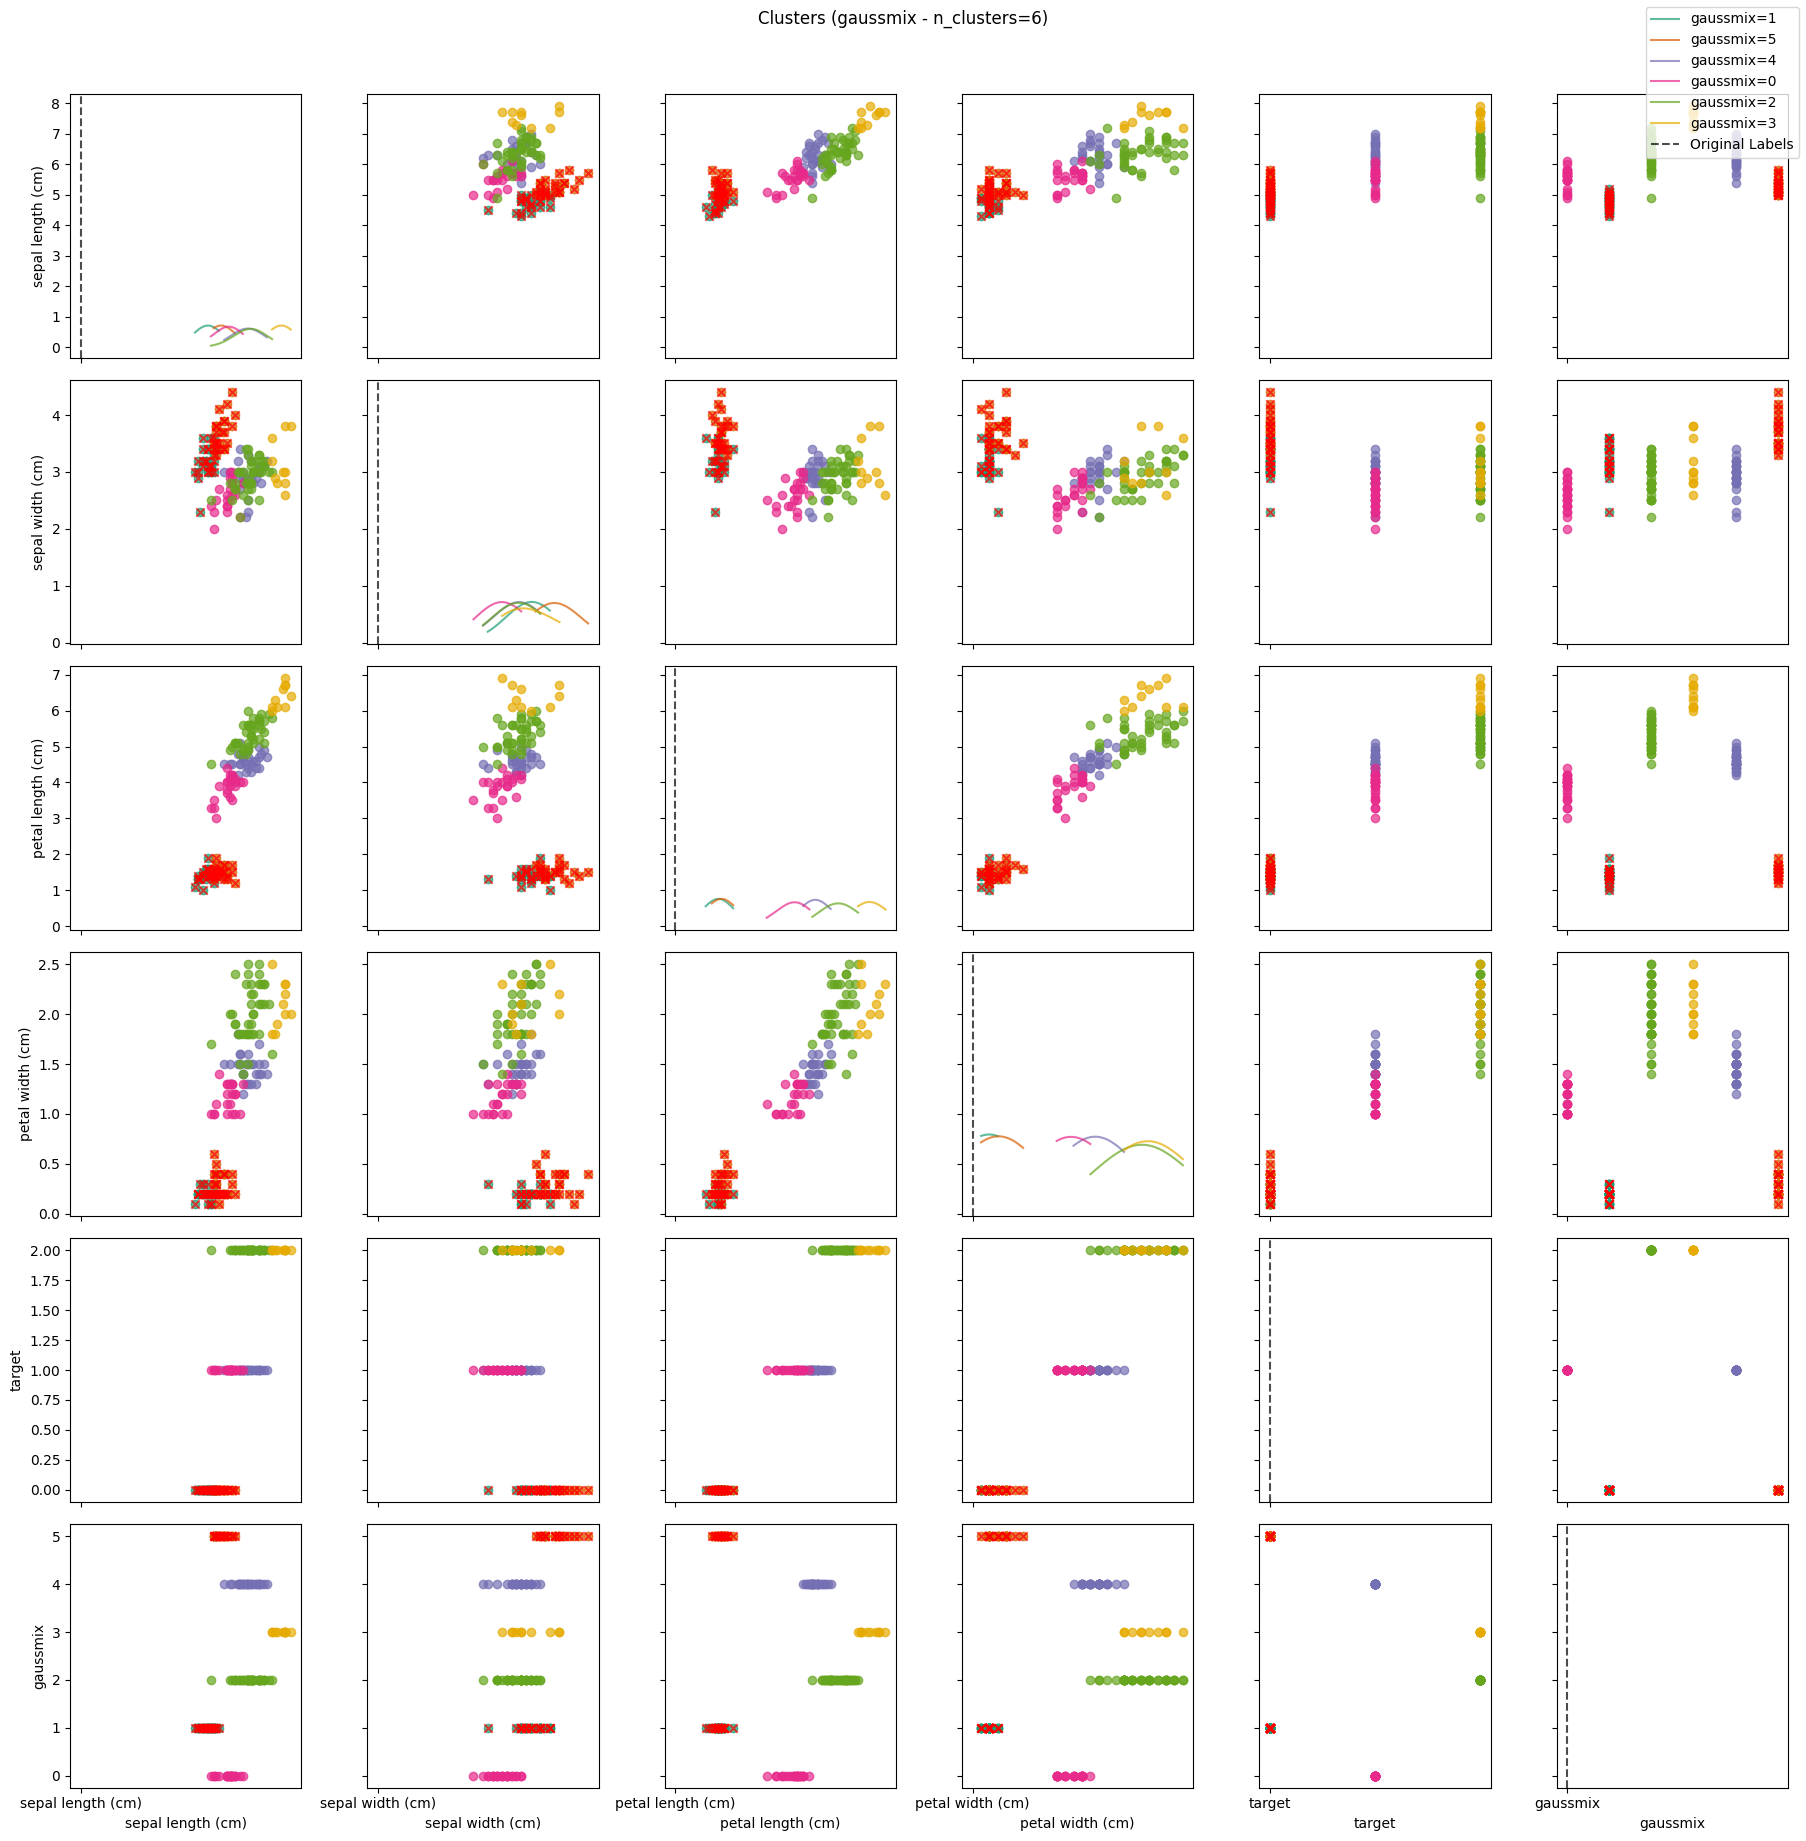

Evaluation for (gaussmix) (n_clusters=6):
Silhouette Score: 0.30456912421428656
Calinski-Harabasz Index: 400.0309469755818
Davies-Bouldin Index: 1.0178858634327623




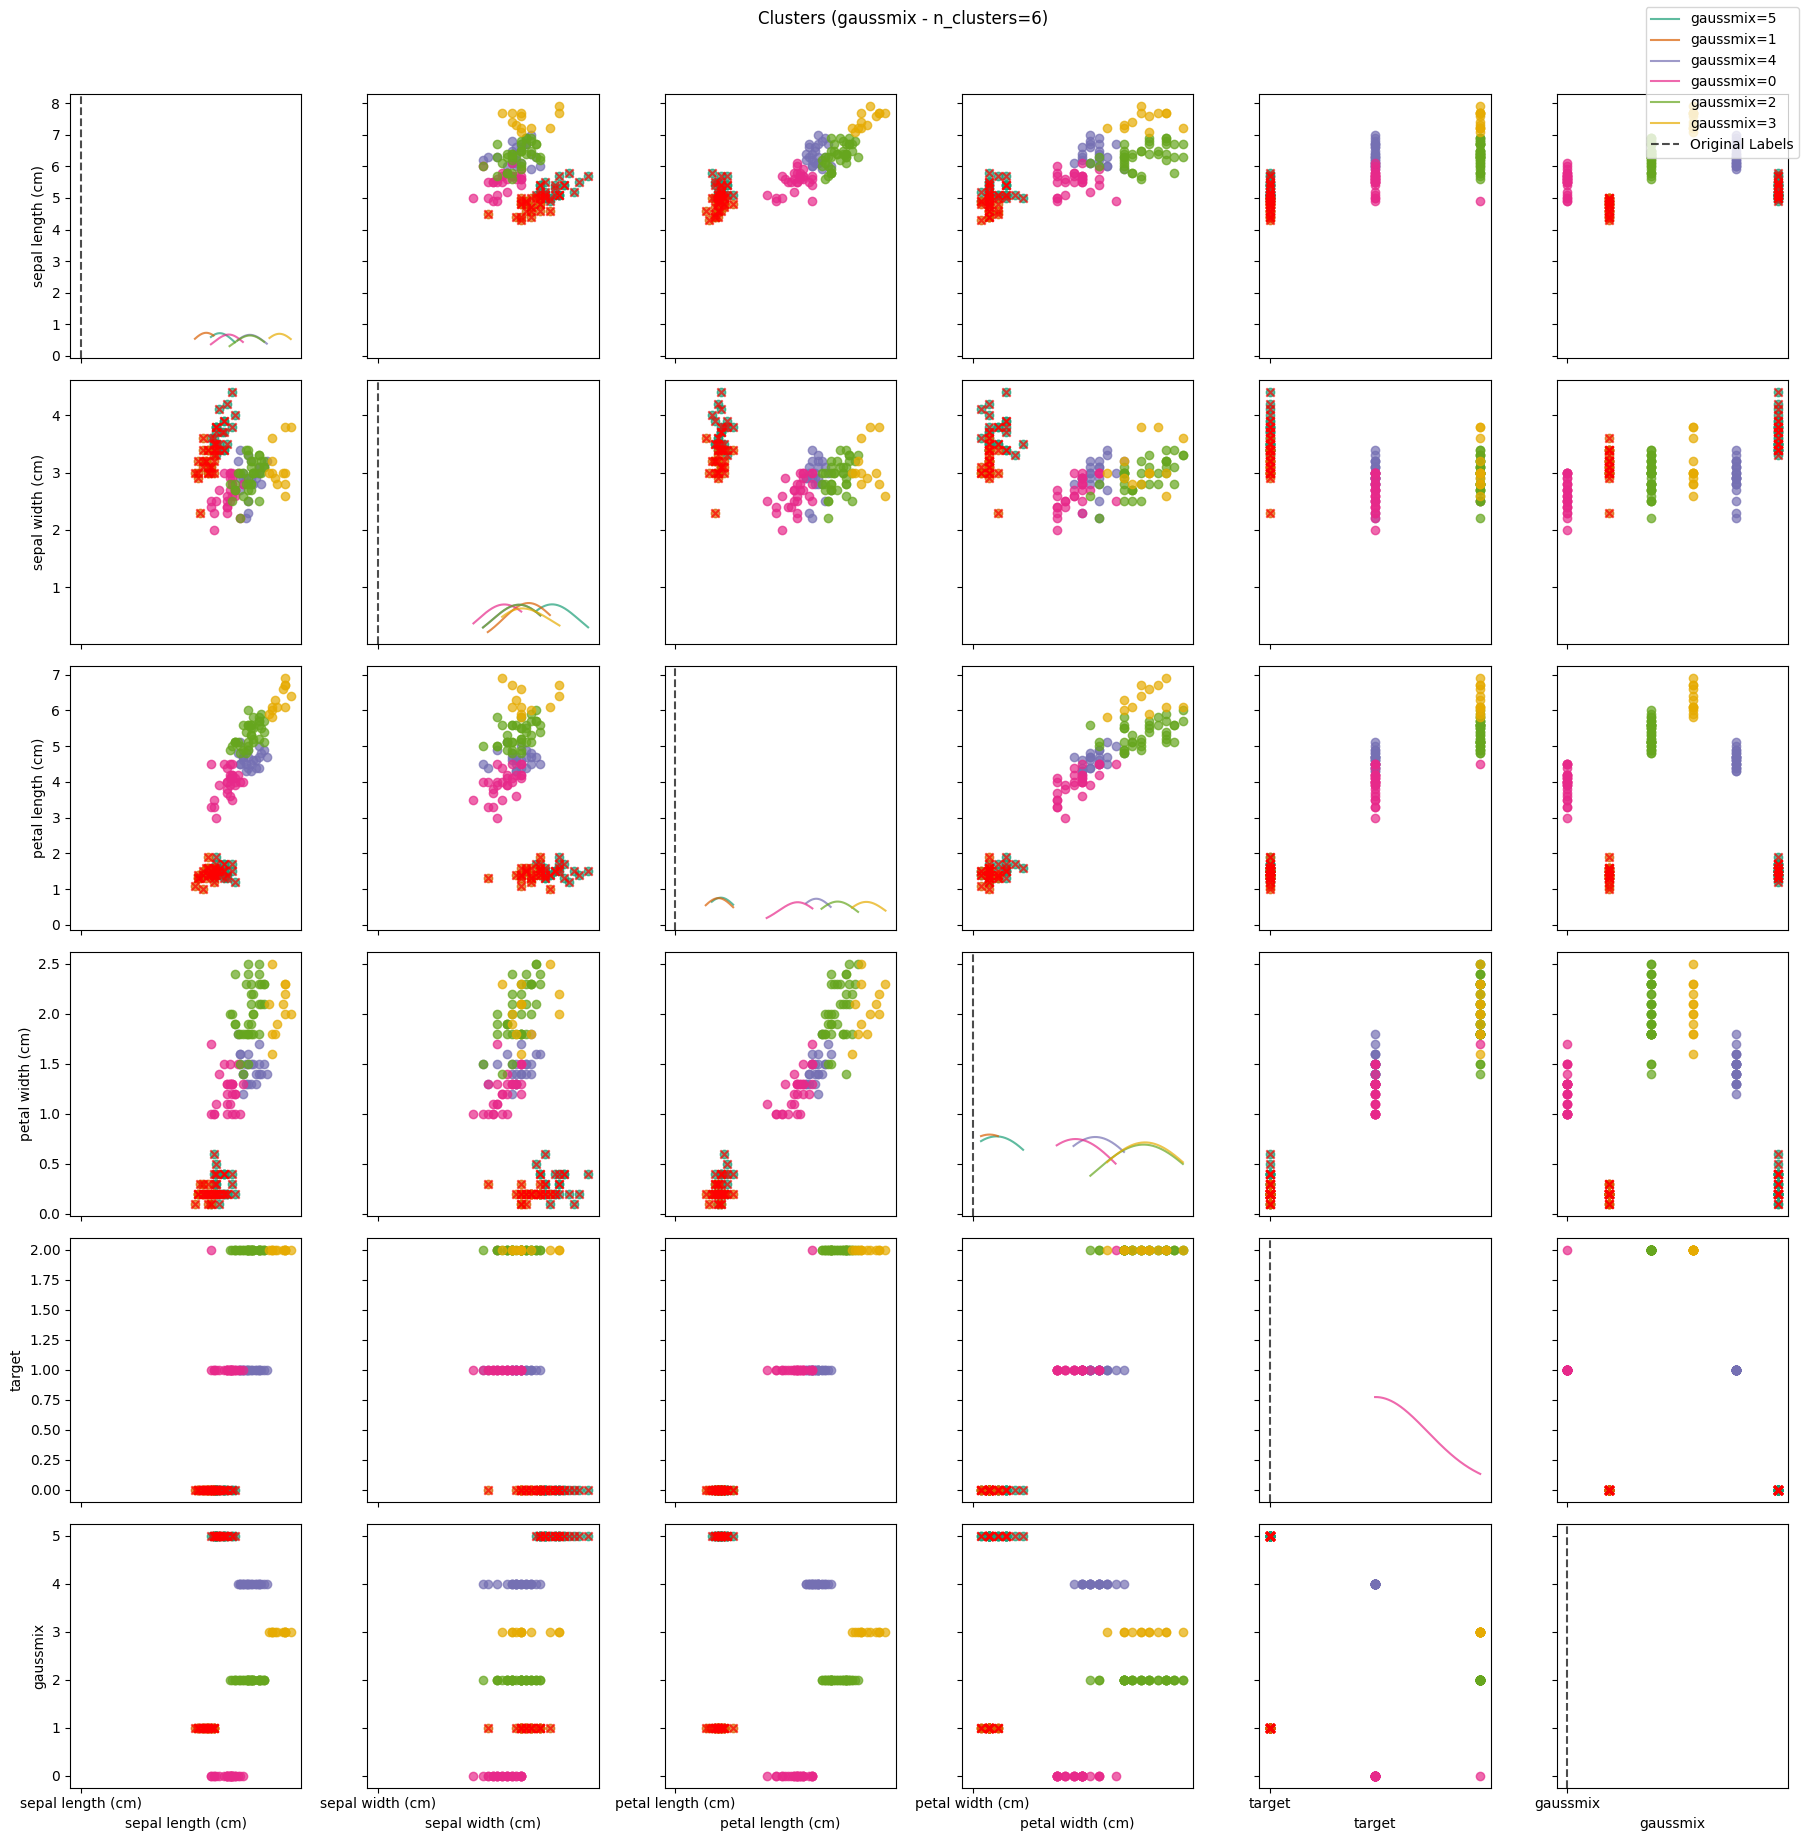

Evaluation for (gaussmix) (n_clusters=6):
Silhouette Score: 0.3359128485239519
Calinski-Harabasz Index: 438.32830166897685
Davies-Bouldin Index: 0.9732138001408539




In [15]:
for n_components in [2, 3, 6]:
    for covar_type in ['full', 'diag', 'spherical']:
        df_exp = run_gaussmixm( main_df.copy(), n_components, covar_type )
        plotar_clusters( df_exp, 'gaussmix', f'n_clusters={n_components}' )
        avaliar_clusters( df_exp, 'gaussmix', f'n_clusters={n_components}' ) 

### DBSCAN

In [16]:
def run_dbscan( df, eps, min_samples ):
    dbscan = DBSCAN( eps=eps, min_samples=min_samples )
    df['dbscan'] = dbscan.fit_predict( df )

    return df

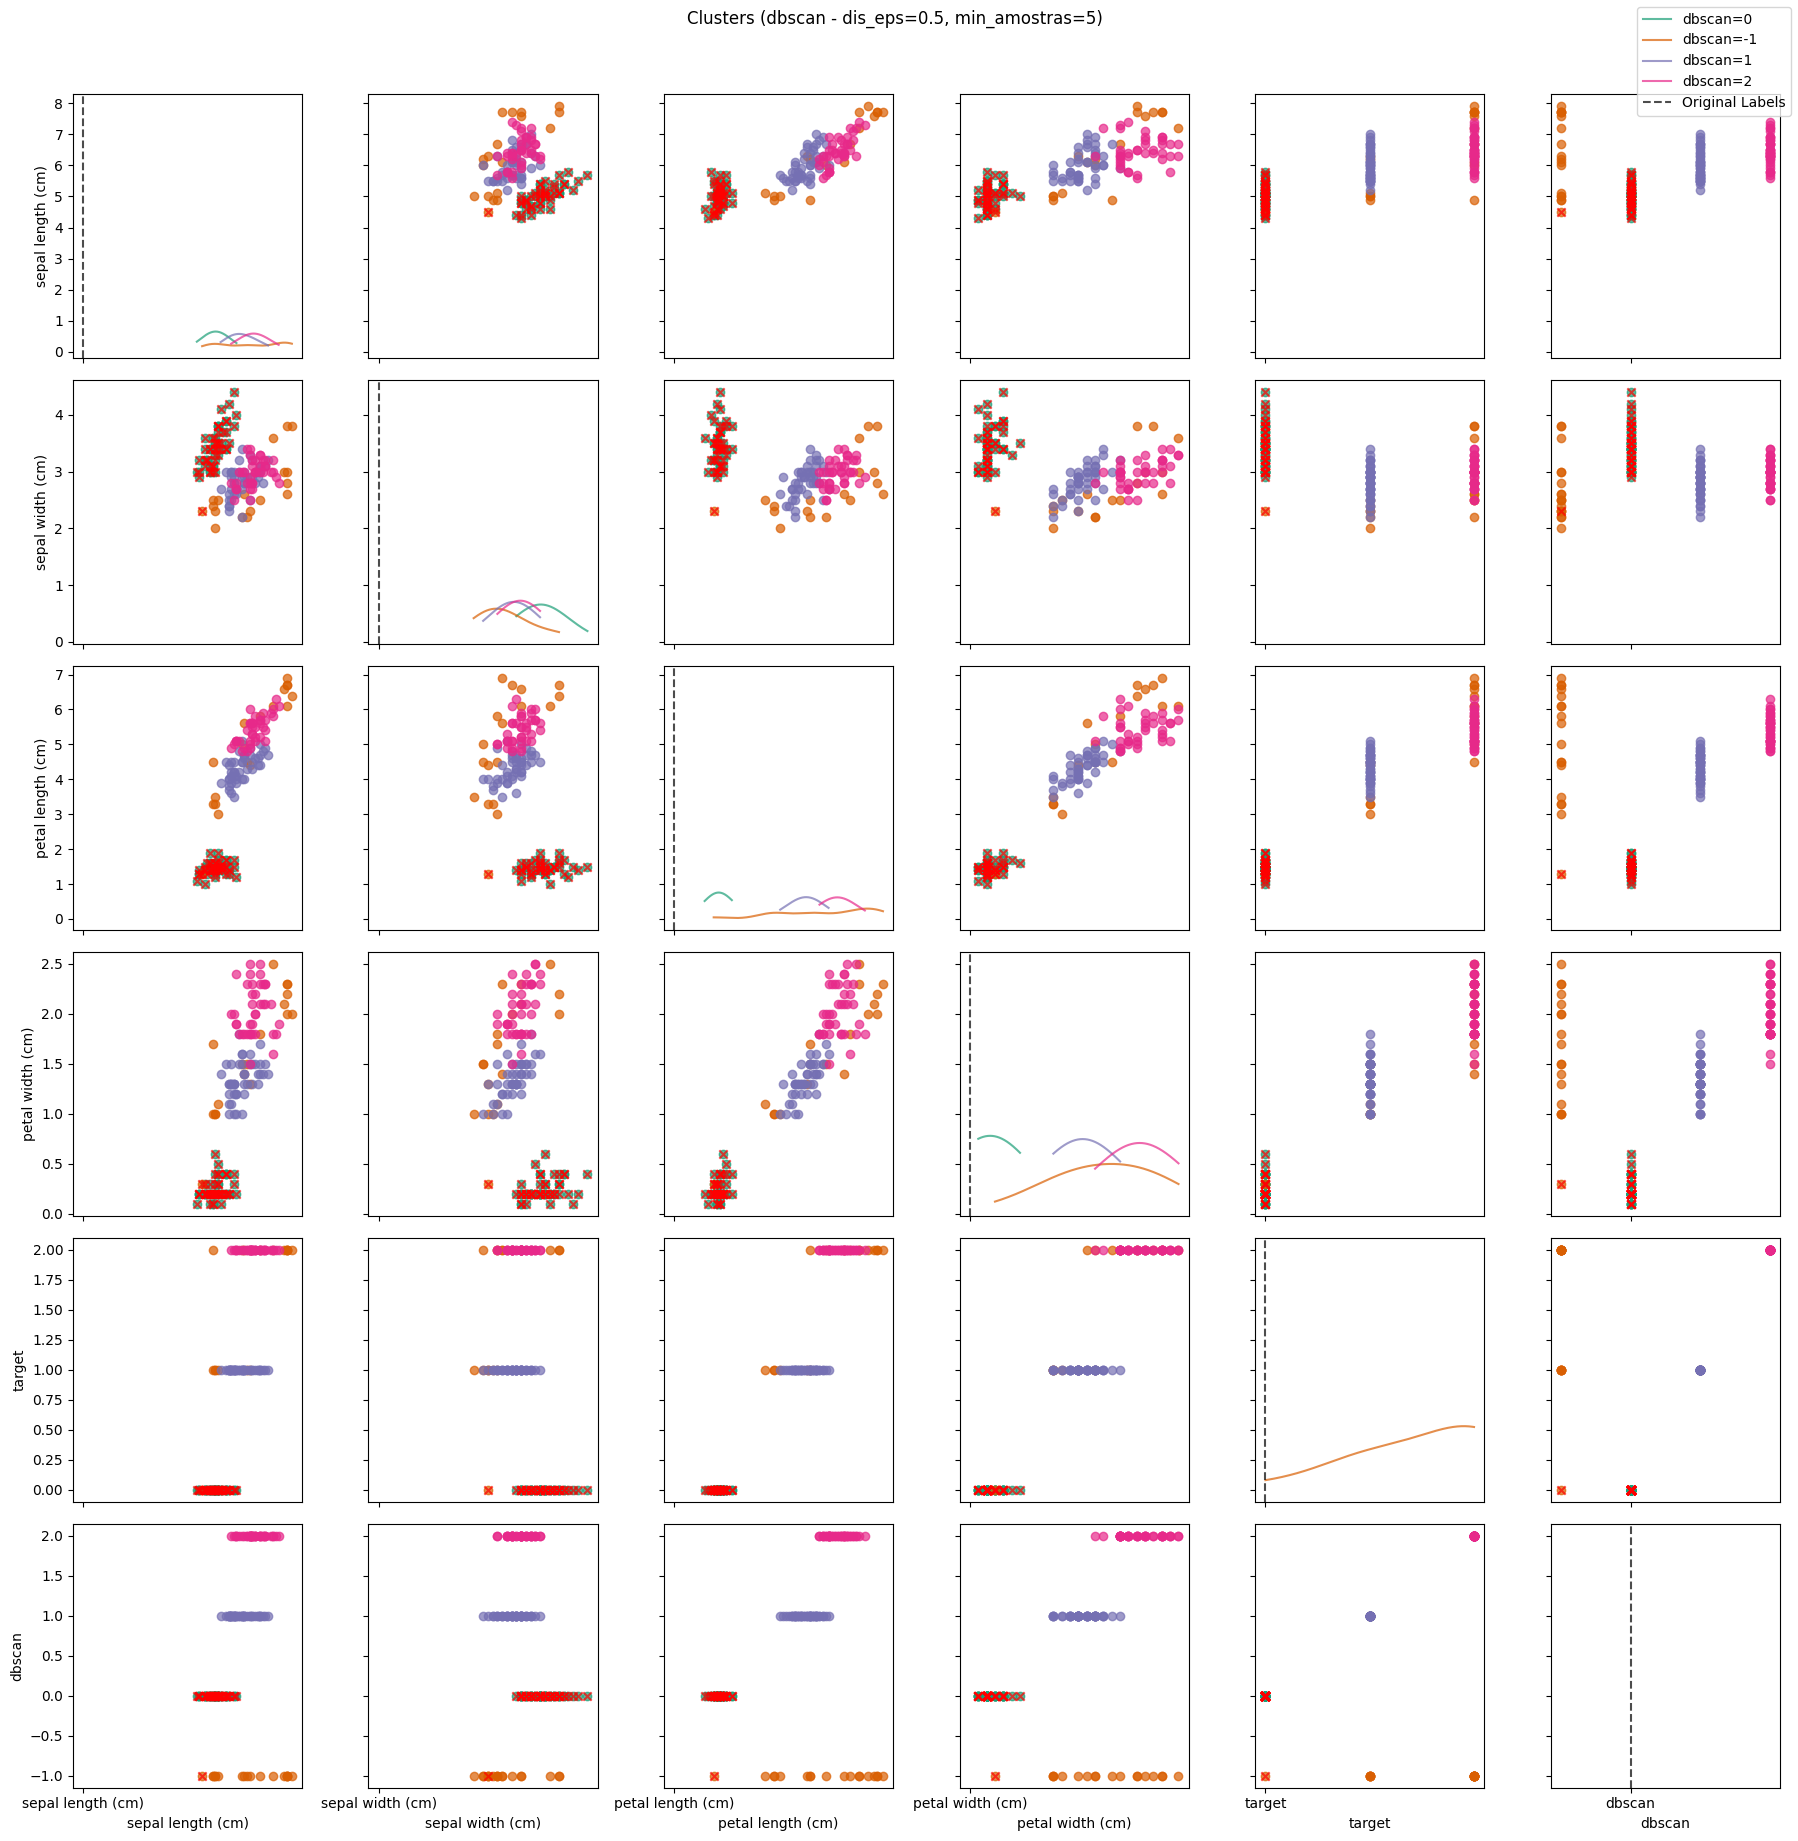

Evaluation for (dbscan) (dis_eps=0.5, min_amostras=5):
Silhouette Score: 0.4245129550197858
Calinski-Harabasz Index: 202.96521089239204
Davies-Bouldin Index: 2.8035463416417503




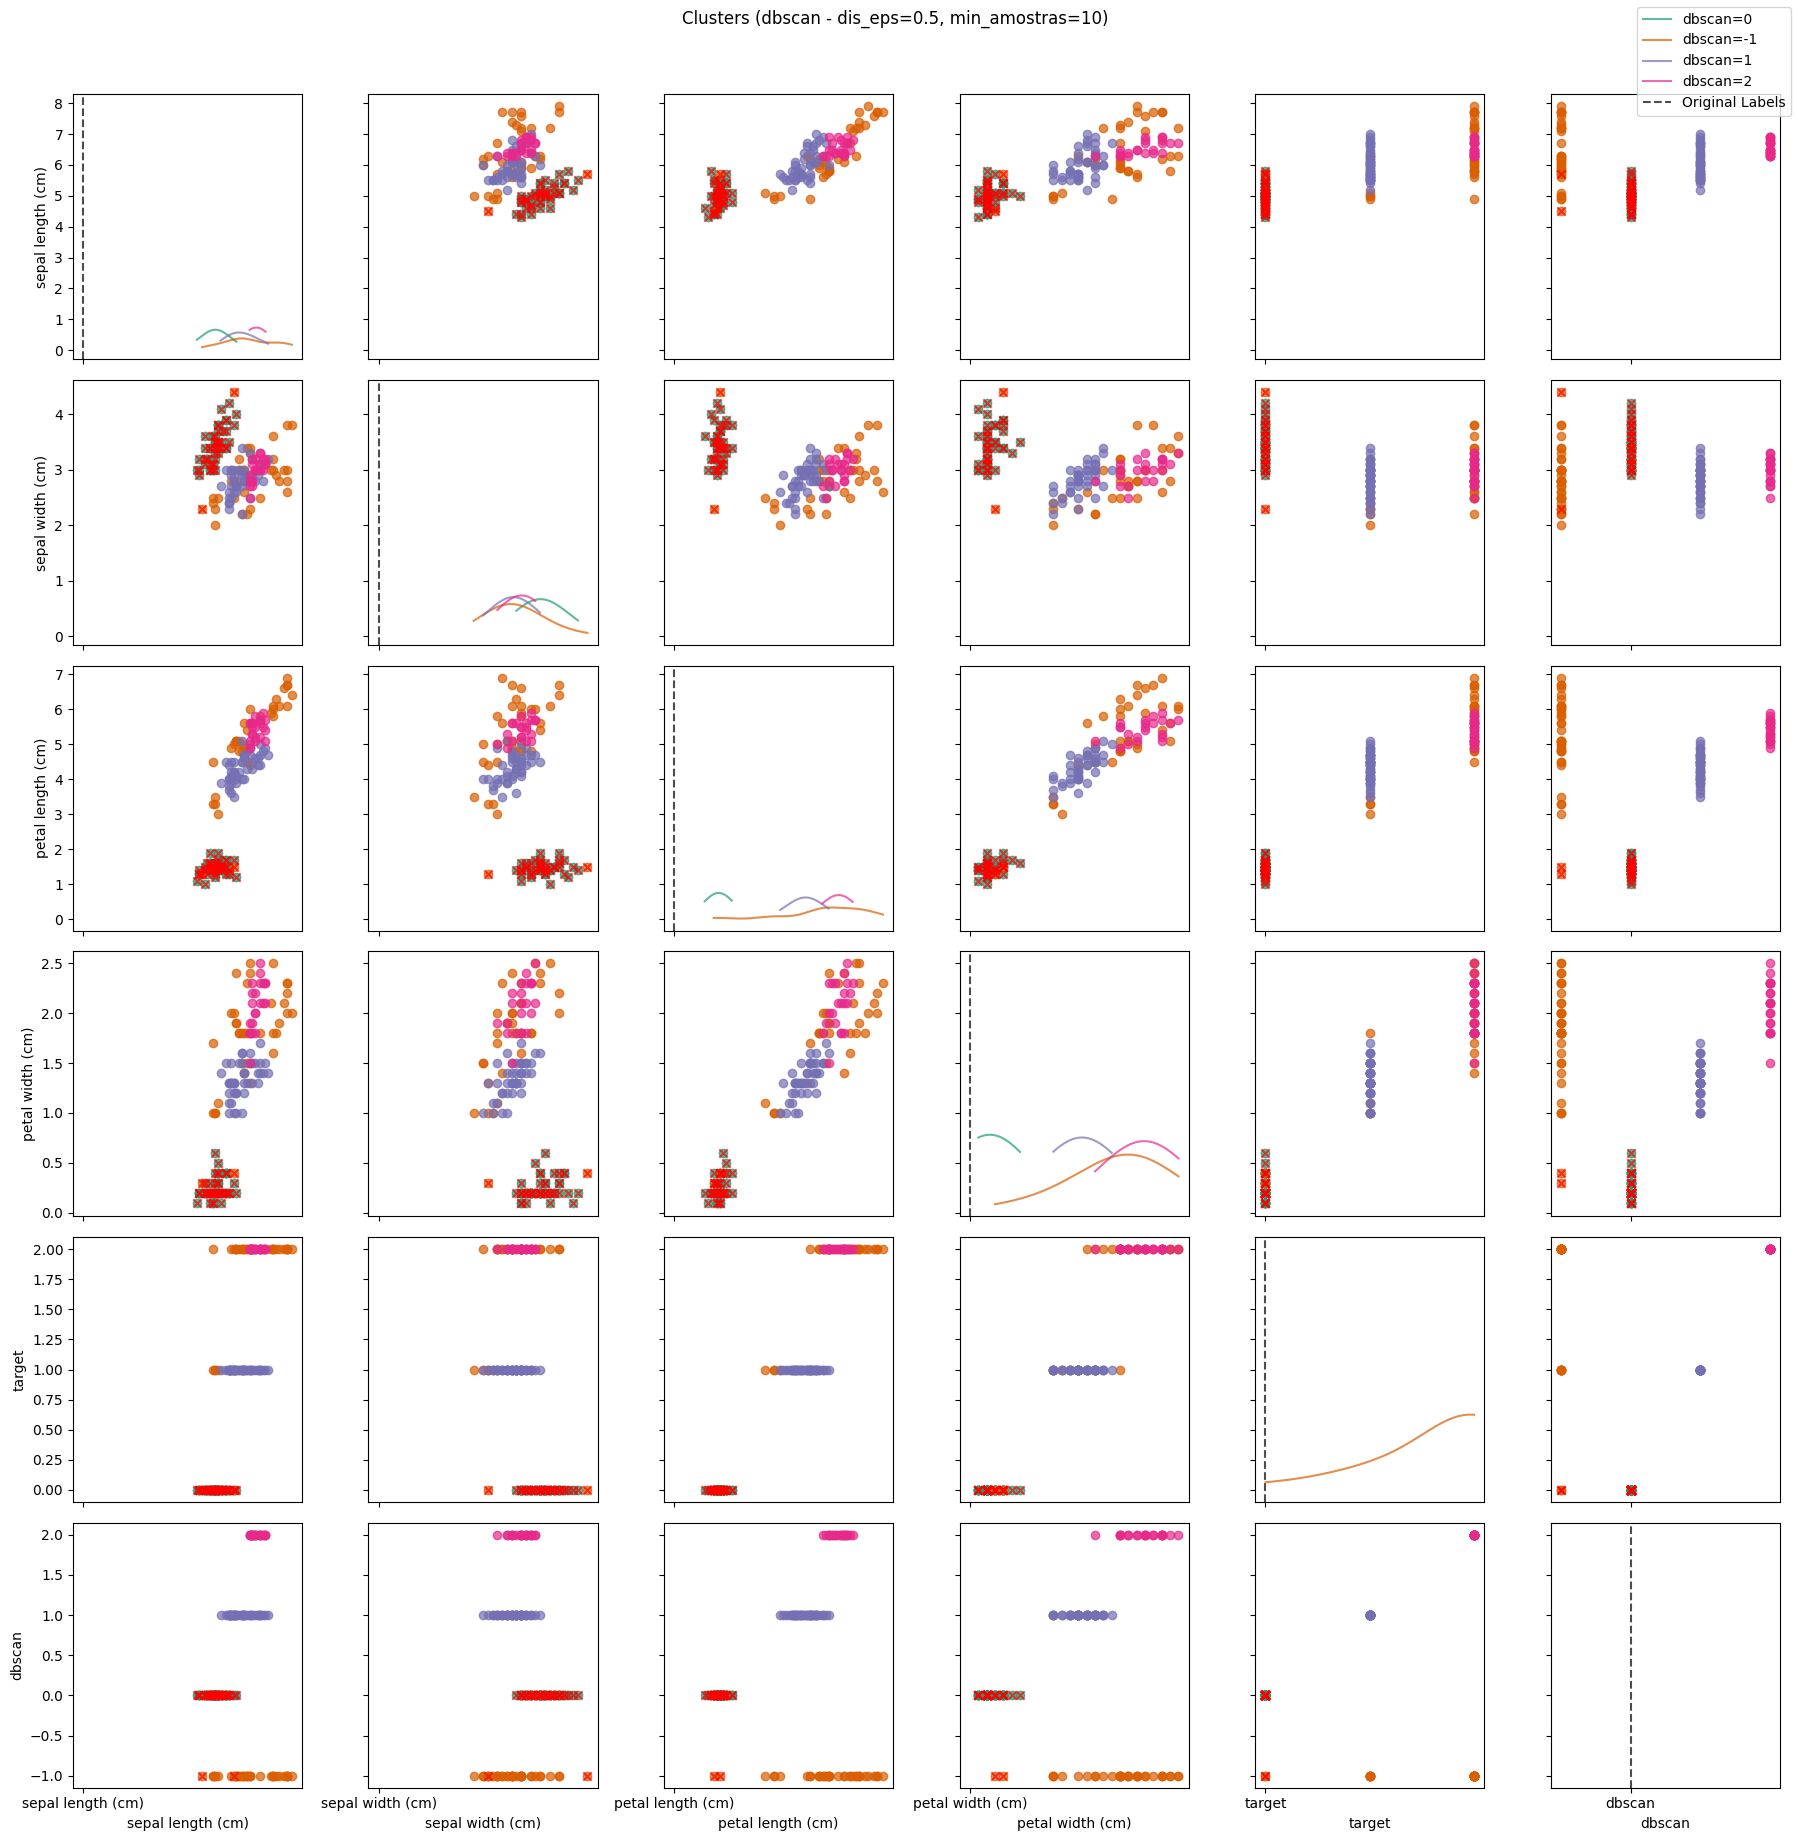

Evaluation for (dbscan) (dis_eps=0.5, min_amostras=10):
Silhouette Score: 0.34656512408306767
Calinski-Harabasz Index: 170.90297124870082
Davies-Bouldin Index: 2.448822967867377




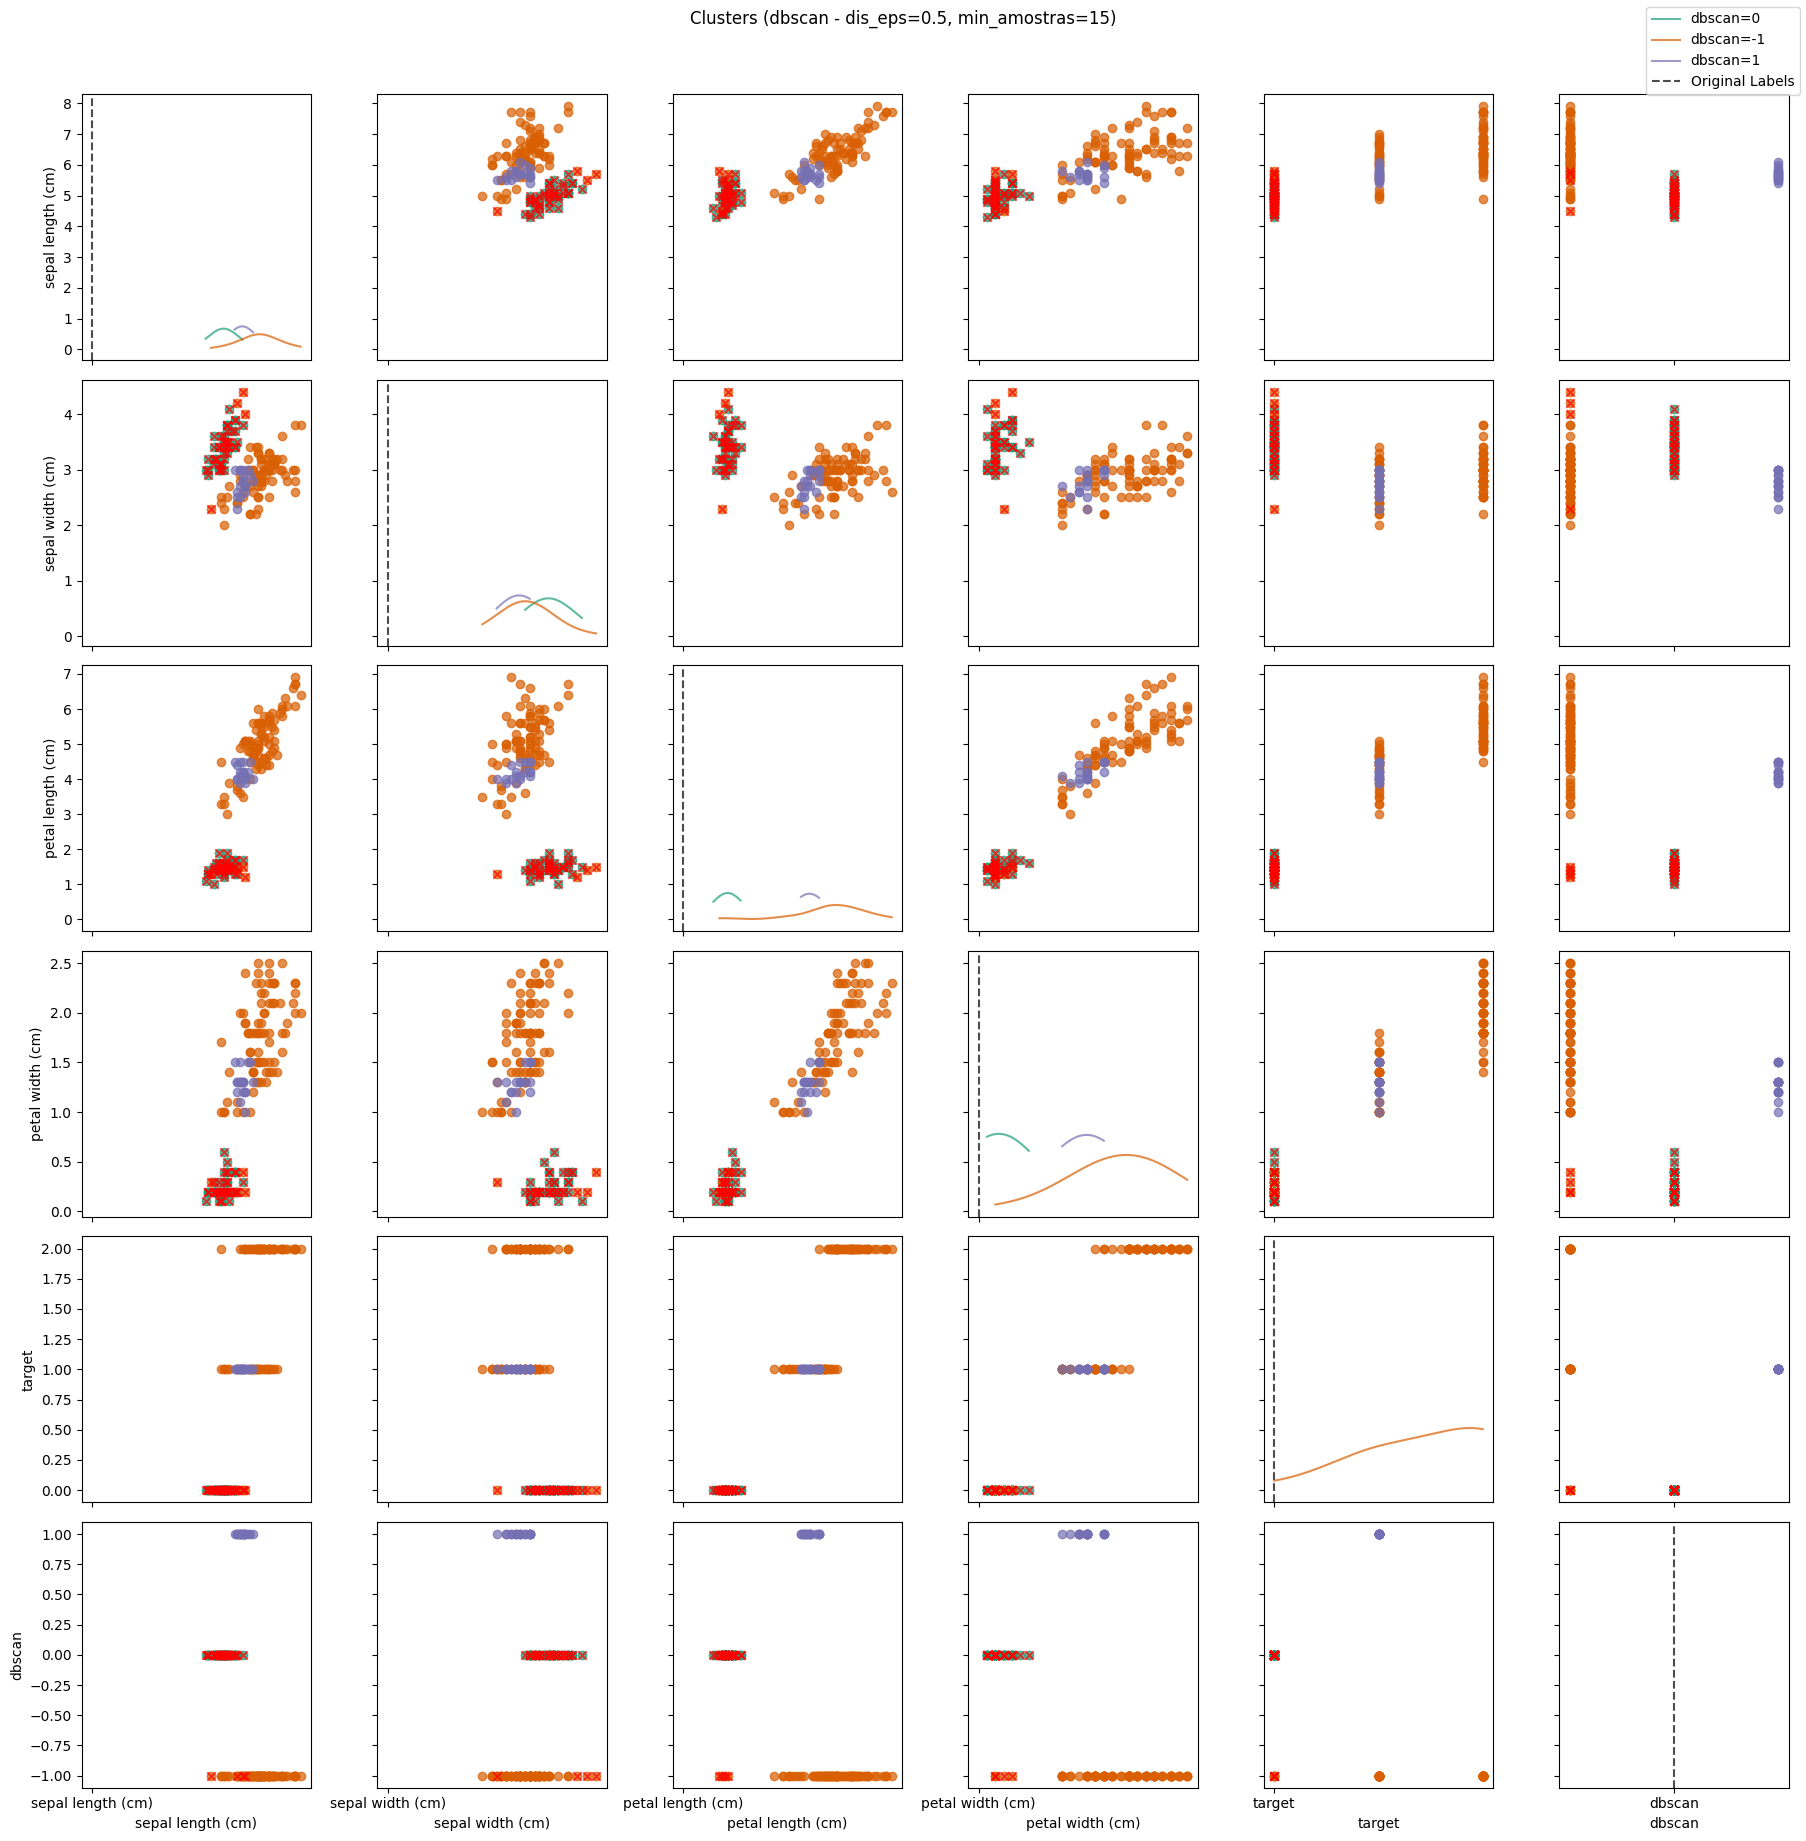

Evaluation for (dbscan) (dis_eps=0.5, min_amostras=15):
Silhouette Score: 0.2776112439088644
Calinski-Harabasz Index: 177.52709284323558
Davies-Bouldin Index: 1.1000541810924482




In [ ]:
for epss in [0.5, 1, 1.5]:
    for min_samples in [ 5, 10, 15]:
        df_exp = run_dbscan( main_df.copy(), epss, min_samples )
        plotar_clusters( df_exp, 'dbscan', f'dis_eps={ epss }, min_amostras={ min_samples }' )
        avaliar_clusters( df_exp, 'dbscan', f'dis_eps={ epss }, min_amostras={ min_samples }' ) 
plt.show()

### Análise dos resultados

*Aqui uma análise e conclusões sobre os resultados obtidos.*

O **Silhouette score** mede o quão bem cada instância de dados se<br> 
encaixa em seu próprio cluster em comparação com os clusters vizinhos<br> 
mais próximos, combinando a ideia de separação entre clusters com a<br> 
coesão interna de cada cluster e fornecendo uma visão abrangente da<br> 
qualidade da clusterização.

A **métrica Calinski-Harabasz** foi utilizada para avaliar a qualidade<br> 
dos clusters gerados pelo K-Means. Essa métrica mede a relação entre a<br> 
dispersão dentro dos clusters e a dispersão entre os clusters. Quanto maior<br> 
o valor do índice Calinski-Harabasz, melhor é a separação entre os clusters.

O **índice de Davies-Bouldin** é uma métrica para avaliar a separação e<br> 
compacidade de clusters. Baseia-se na ideia de que bons agrupamentos são<br> 
aqueles que apresentam baixa variação intra-cluster e alta separação<br> 
entre-agrupamento. O DBI é calculado como a média da razão máxima entre a<br> 
distância intra-cluster e a distância entre-cluster para cada cluster.<br> 
Quanto menor o DBI, melhor a qualidade do clustering.


## K-Means obteve os seguintes resultados:

### Para numero de clusters = 2: apresenta clusters bem definidos, com uma boa divisão
- Silhouette Score: 0.681  - bom valor para a métrica

- Calinski-Harabasz Index: 513.924  - clusters de qualidade 

- Davies-Bouldin Index: 0.404  - clusters de muito boa qualidade

### Para numero de clusters = 3: apresenta clusters de baixa qualidade, mas ainda razoáveis
- Silhouette Score: 0.552  - valor fraco para a métrica

- Calinski-Harabasz Index: 561.627  - clusters de boa qualidade

- Davies-Bouldin Index: 0.661  - clusters de baixa qualidade


### Para numero de clusters = 6: apresenta clusters de baixa qualidade, muito dispersos
- Silhouette Score: 0.364  - valor ruim para a métrica

- Calinski-Harabasz Index: 473.850  - clusters de baixa qualidade

- Davies-Bouldin Index: 0.914  - clusters de muito pouca qualidade




## Gaussian Mixture obteve os seguintes resultados:

### Para numero de clusters = 2, covariance_type: 'full', 'diag' e 'spherical':
Silhouette Score  - bom valor para a métrica, com nenhuma variação nos resultados<br>0.686 ;  0.686 ;  0.686 ;

Calinski-Harabasz Index  - clusters de qualidade, com nenhuma variação nos resultados<br>502.821 ;  502.821 ;  502.821 ;

Davies-Bouldin Index  - clusters de excelente qualidade<br>0.382 ;  0.382 ;  0.382 ;


### Para numero de clusters = 3, covariance_type: 'full', 'diag' e 'spherical':
Silhouette Score  - valor fraco para a métrica, com baixa variação nos resultados<br>0.503 ;  0.503 ;  0.517 ;

Calinski-Harabasz Index  - valor fraco para a métrica, com variação nos resultados ao final<br>487.330 ;  487.330 ;  519.220 ;

Davies-Bouldin Index:  - clusters de baixa qualidade, com baixa variação nos resultados<br>0.751 ;  0.751 ;  0.714 ;

### Para numero de clusters = 6, covariance_type: 'full', 'diag' e 'spherical':
Silhouette Score  - valor ruim para a métrica, mesmo com a variação nos resultados<br>0.223 ;  0.304 ;  0.335 ;

Calinski-Harabasz Index  - valor fraco para a métrica, mesmo com a variação nos resultados<br>322.965 ;  400.030 ;  438.328 ;

Davies-Bouldin Index  - clusters de muito pouca qualidade, com baixa variação nos resultados<br>1.170 ;  1.017 ;  0.973 ;


## DBSCAN obteve os seguintes resultados:


Evaluation for (dbscan) (dis_eps=0.5, min_amostras=5): <br>
Silhouette Score: 0.424 <br>
Calinski-Harabasz Index: 202.965 <br>
Davies-Bouldin Index: 2.803 <br>

Evaluation for (dbscan) (dis_eps=0.5, min_amostras=10): <br>
Silhouette Score: 0.346 <br>
Calinski-Harabasz Index: 170.902 <br>
Davies-Bouldin Index: 2.448 <br>

Evaluation for (dbscan) (dis_eps=0.5, min_amostras=15): <br>
Silhouette Score: 0.277 <br>
Calinski-Harabasz Index: 177.527 <br>
Davies-Bouldin Index: 1.100 <br>

Evaluation for (dbscan) (dis_eps=1, min_amostras=5): <br>
Silhouette Score: 0.503 <br>
Calinski-Harabasz Index: 487.330 <br>
Davies-Bouldin Index: 0.751 <br>

Evaluation for (dbscan) (dis_eps=1, min_amostras=10): <br>
Silhouette Score: 0.503 <br>
Calinski-Harabasz Index: 487.330 <br>
Davies-Bouldin Index: 0.751 <br>

Evaluation for (dbscan) (dis_eps=1, min_amostras=15): <br>
Silhouette Score: 0.457 <br>
Calinski-Harabasz Index: 352.159 <br>
Davies-Bouldin Index: 0.699 <br>

Evaluation for (dbscan) (dis_eps=1.5, min_amostras=5): <br>
Silhouette Score: 0.686 <br>
Calinski-Harabasz Index: 502.821 <br>
Davies-Bouldin Index: 0.382 <br>

Evaluation for (dbscan) (dis_eps=1.5, min_amostras=10): <br>
Silhouette Score: 0.686 <br>
Calinski-Harabasz Index: 502.821 <br>
Davies-Bouldin Index: 0.382 <br>

Evaluation for (dbscan) (dis_eps=1.5, min_amostras=15): <br>
Silhouette Score: 0.686 <br>
Calinski-Harabasz Index: 502.821 <br>
Davies-Bouldin Index: 0.382 <br>



#### No Geral, o algoritmo K-Means quando recebendo n_clusters=2, obteve melhor separção. <br>O algoritmo Gaussian Mixture com n_componentes=2 e tipo_covariancia=full apresentou <br>resultados que podem ser ditos consistentes.Enquanto o algoritmo DBSCAN com eps=1, <br>min_amostras=25 mostrou boa separação sem outliers.